In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [314]:
def bool_to_color(X):
    mapping = {'0':'r', '1':'b'}
    return [mapping[str(int(xi))] for xi in X]

def generate_graph(A, X):
    # Create DiGraph from A
    G = nx.from_numpy_matrix(A, create_using=nx.DiGraph)

    # Use spring_layout to handle positioning of graph
    layout = nx.spring_layout(G)
    
    # Use a list for node colours
    color_map = bool_to_color(X)

    # Draw the graph using the layout - with_labels=True if you want node labels.
    nx.draw(G, layout, with_labels=True, node_color=color_map)

    # Get weights of each edge and assign to labels
    #labels = nx.get_edge_attributes(G, "weight")
    labels = dict([((u,v,), f'{d["weight"]:.1f}') for u,v,d in G.edges(data=True)])
    #print(labels)
    # Draw edge labels using layout and list of labels
    nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)

    # Show plot
    plt.show()

#  Funcion optimización
Para este problema la euristica a minimizar a través del algoritmo es el  hamiltoniano del problema
$$
H=-\sum_{i, j} J_{i j} \sigma_i \sigma_j+h \sum_i \sigma_i
$$
Acá, $\sigma_i$ representa el valor del espin y $J_{ij}$ es el acople entre los espines i y j

En la implementación usaremos valores boleanos 0 y 1 como variables que representan a los espines -1/2 y 1/2.

In [285]:
A = []
def hamiltonian(X):
    sum_h = 0
    for i in range(A.shape[0]):
        for j in range(i):
            sum_h -= A[i,j]*(X[i]-1/2)*((X[j]-1/2))
        #print(i, sum_h)
    return sum_h

def magnetization(X):
    mapping = {0:-1,1:1}
    M = 0
    for xi in X: M += mapping[int(xi)]
    return M

## Implementacion

In [286]:
def eq_array(A,B):
    n=-1
    while True:
        try:
            n = A.index(B[0],n+1)
        except ValueError:
            return False
        if A[n:n+len(B)]==B:
            return True
        
def is_new_array(A,B):
    bol_sum = list(np.array(A)+np.array(B))
    if (not eq_array(A,B)) and (not eq_array(bol_sum, [1 for i in range(len(A))])):
        return True
    else:
        return False
    

In [306]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

def generate_solutions(A):
    N = A.shape[0]*5
    best_solutions = []

    import time

    # Measuring execution time
    st = time.time()

    for i in range(N):
        model=ga(function=hamiltonian,dimension=A.shape[0],variable_type='bool')

        model.run();
        plt.show(block=True)
        i_solution = list(model.best_variable)
        new = 1
        if i==0:
            best_solutions.append(list(model.best_variable))
        for bs in best_solutions: 
            new *= is_new_array(i_solution, bs)
        if new:
            best_solutions.append(list(model.best_variable))

    et = time.time()
    # get the execution time
    elapsed_time = et - st
    print('Total execution time:', elapsed_time, 'seconds')
    
    return best_solutions

def analize_solutions(best_solutions, A):
    print('Solutions found: ',len(best_solutions))
    best_solutions.sort(key=hamiltonian)
    Hmin = hamiltonian(best_solutions[0])
    for bs in best_solutions:
        hbs = hamiltonian(bs)
        if hbs <= Hmin:
            Hmin = hbs
            print('-------------------')
            print('Magnetization: ',magnetization(bs))
            print('H:',hamiltonian(bs))
            generate_graph(A, bs)

### N= 4

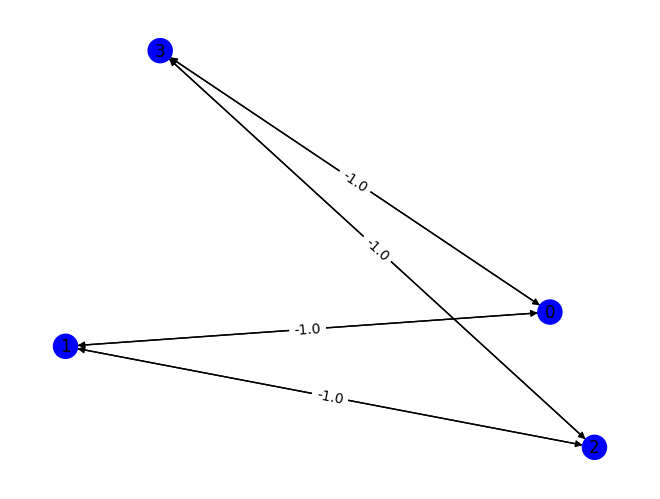

In [333]:
# Matriz de adyacencia
A0 =np.array([[0, 0, 0, 0],
              [1, 0, 0, 0],
              [0, 1, 0, 0],
              [1, 0, 1, 0]])
At = np.transpose(A0)
A = A0 + At
A = -A
X = np.ones(A.shape[0])

generate_graph(A,X)

 The best solution found:                                                                           
 [0. 1. 0. 1.]

 Objective function:
 -1.0


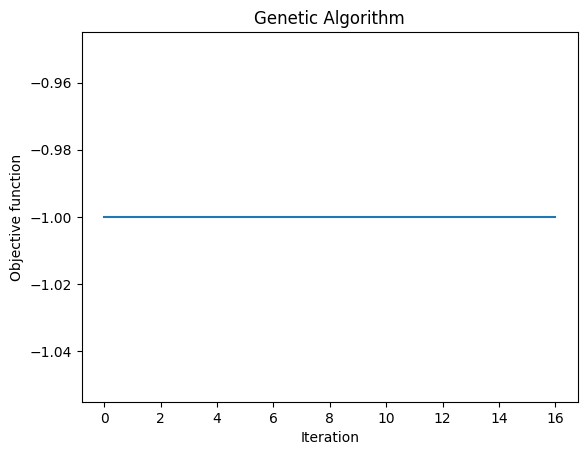

 The best solution found:                                                                           
 [1. 0. 1. 0.]

 Objective function:
 -1.0


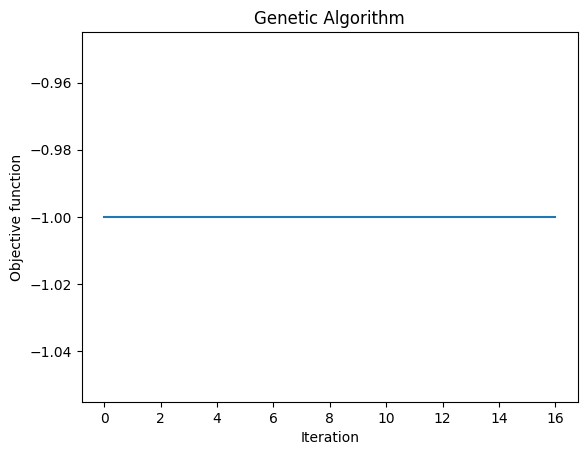

 The best solution found:                                                                           
 [0. 1. 0. 1.]

 Objective function:
 -1.0


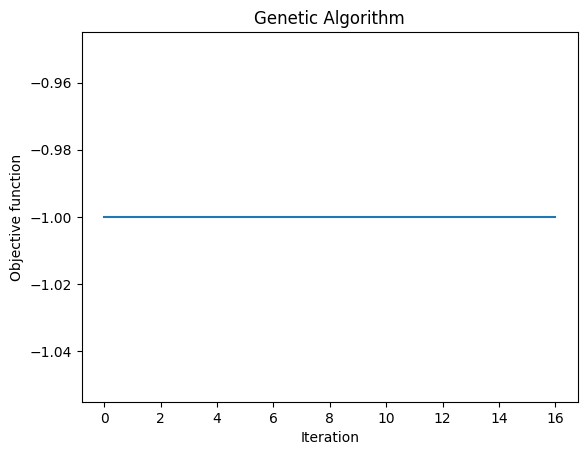

 The best solution found:                                                                           
 [0. 1. 0. 1.]

 Objective function:
 -1.0


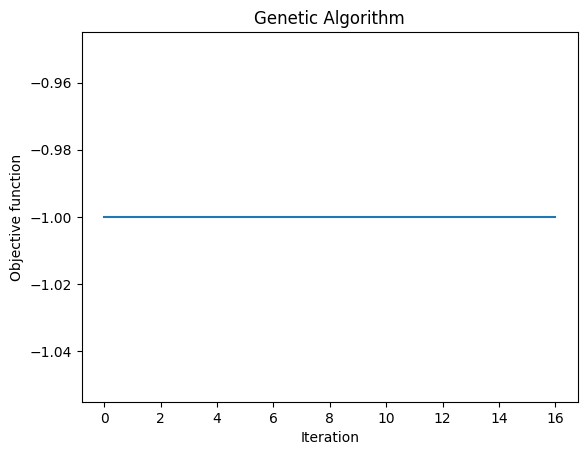

 The best solution found:                                                                           
 [0. 1. 0. 1.]

 Objective function:
 -1.0


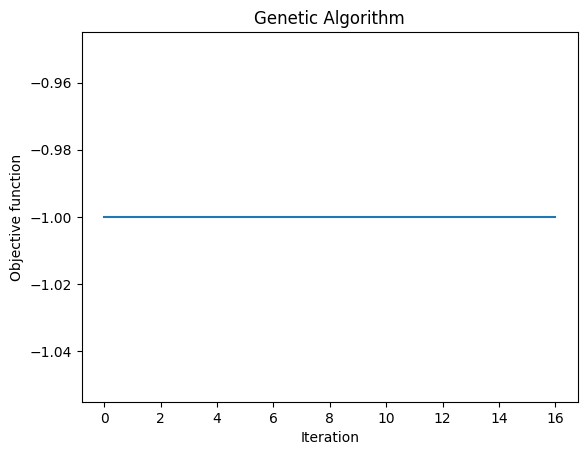

 The best solution found:                                                                           
 [1. 0. 1. 0.]

 Objective function:
 -1.0


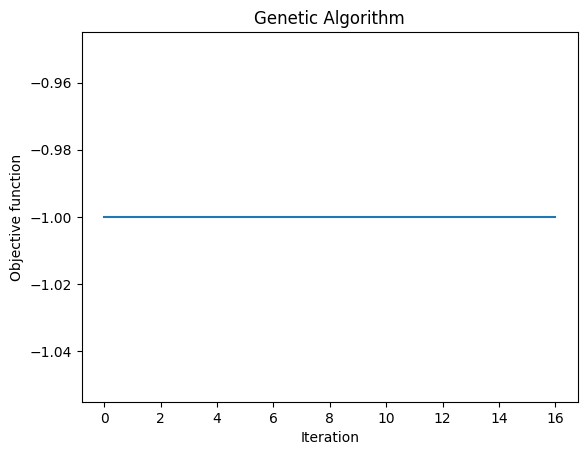

 The best solution found:                                                                           
 [1. 0. 1. 0.]

 Objective function:
 -1.0


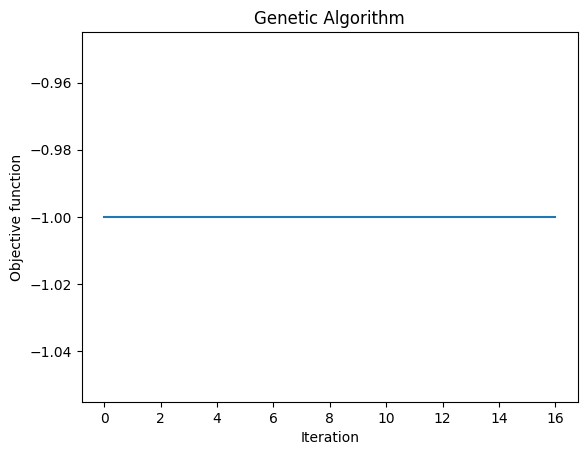

 The best solution found:                                                                           
 [0. 1. 0. 1.]

 Objective function:
 -1.0


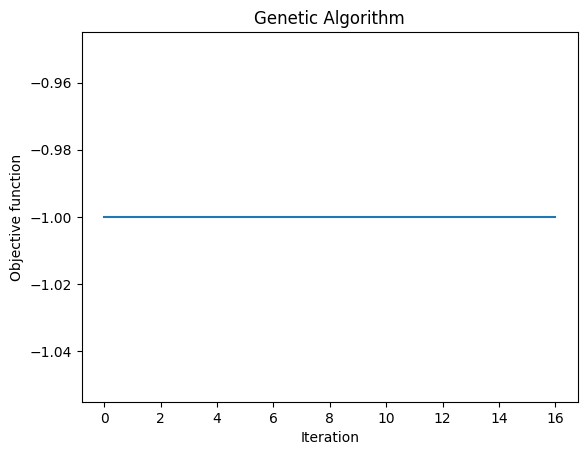

 The best solution found:                                                                           
 [1. 0. 1. 0.]

 Objective function:
 -1.0


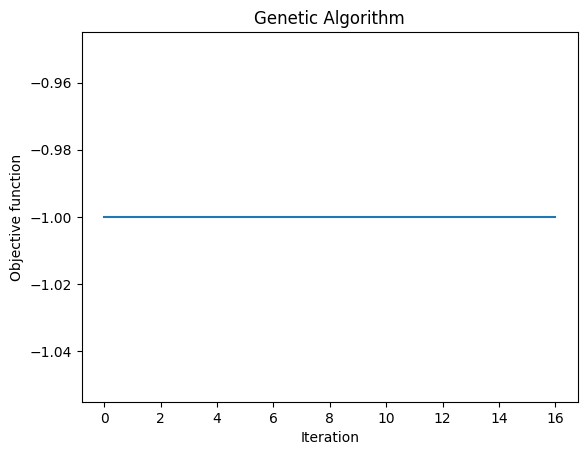

 The best solution found:                                                                           
 [0. 1. 0. 1.]

 Objective function:
 -1.0


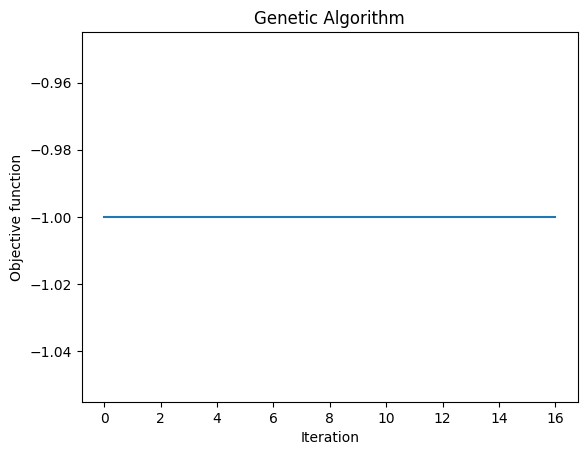

 The best solution found:                                                                           
 [0. 1. 0. 1.]

 Objective function:
 -1.0


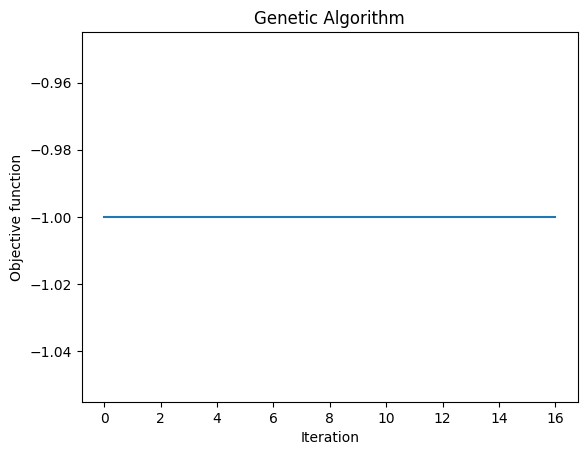

 The best solution found:                                                                           
 [0. 1. 0. 1.]

 Objective function:
 -1.0


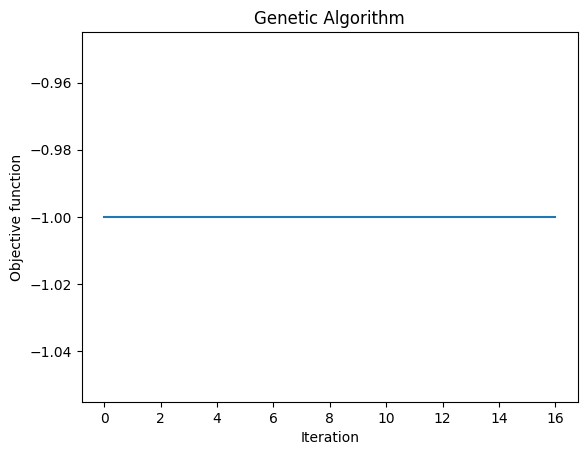

 The best solution found:                                                                           
 [1. 0. 1. 0.]

 Objective function:
 -1.0


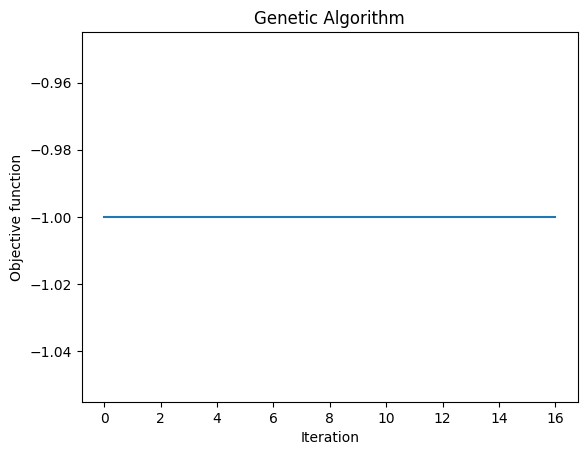

 The best solution found:                                                                           
 [1. 0. 1. 0.]

 Objective function:
 -1.0


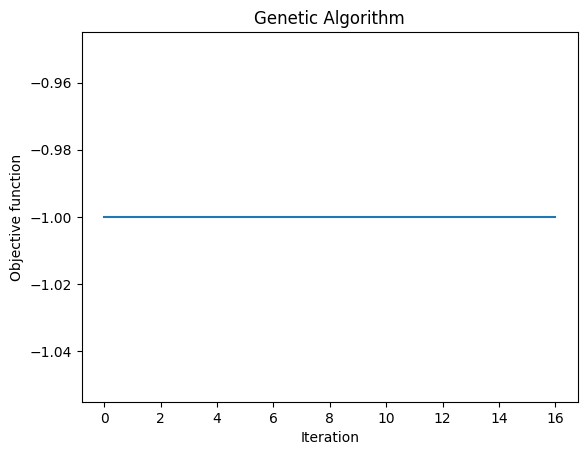

 The best solution found:                                                                           
 [0. 1. 0. 1.]

 Objective function:
 -1.0


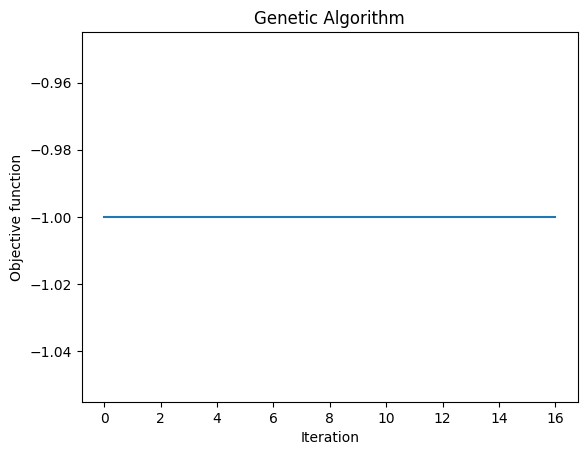

 The best solution found:                                                                           
 [0. 1. 0. 1.]

 Objective function:
 -1.0


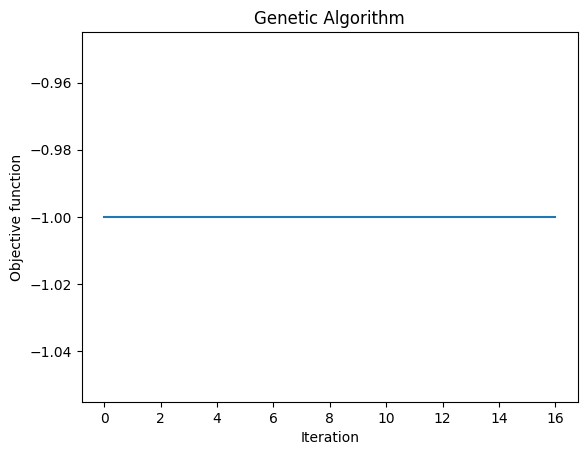

 The best solution found:                                                                           
 [0. 1. 0. 1.]

 Objective function:
 -1.0


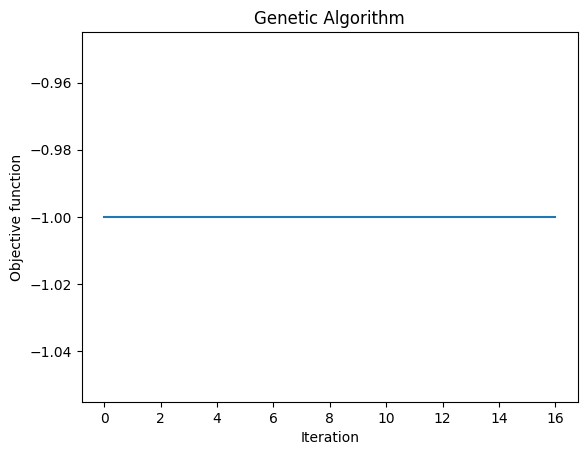

 The best solution found:                                                                           
 [1. 0. 1. 0.]

 Objective function:
 -1.0


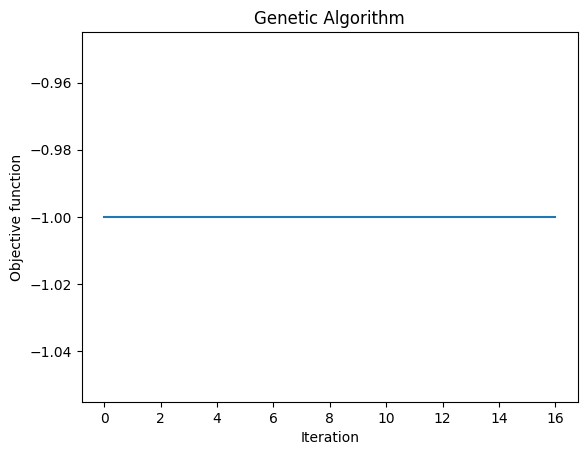

 The best solution found:                                                                           
 [0. 1. 0. 1.]

 Objective function:
 -1.0


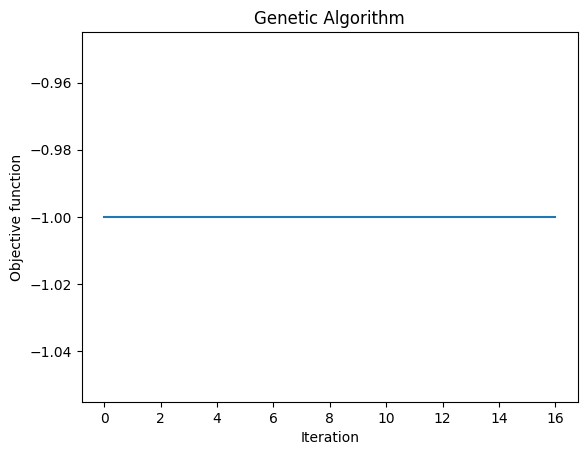

 The best solution found:                                                                           
 [1. 0. 1. 0.]

 Objective function:
 -1.0


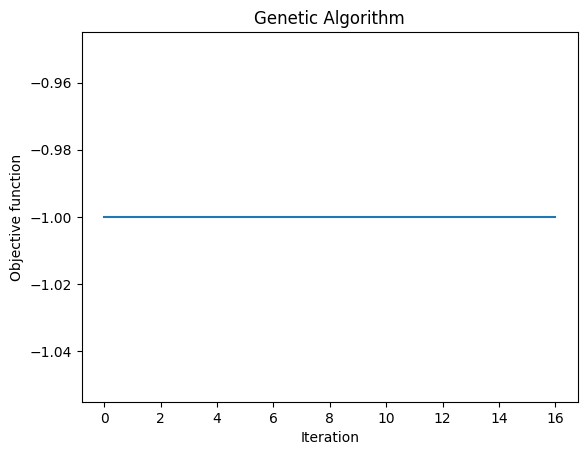

Total execution time: 5.842127084732056 seconds


In [338]:
# Calculamos las soluciones
best_solutions = generate_solutions(A)

Solutions found:  1
-------------------
Magnetization:  0
H: -1.0


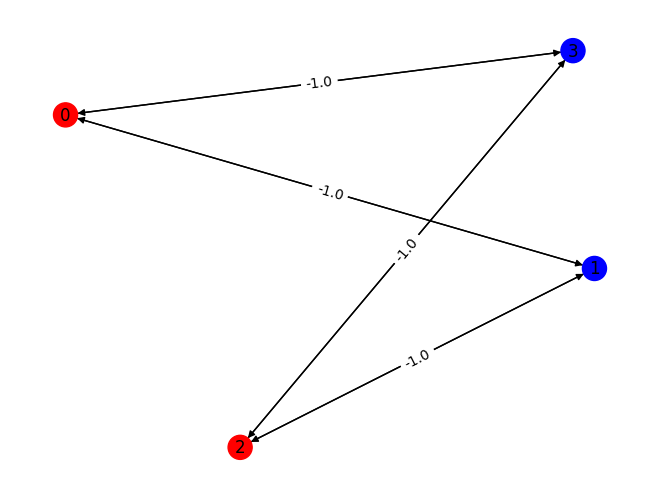

In [339]:
# Filtramos las soluciones resultantes para obtener y visualizar la de menor energía
analize_solutions(best_solutions, A)

# N = 3

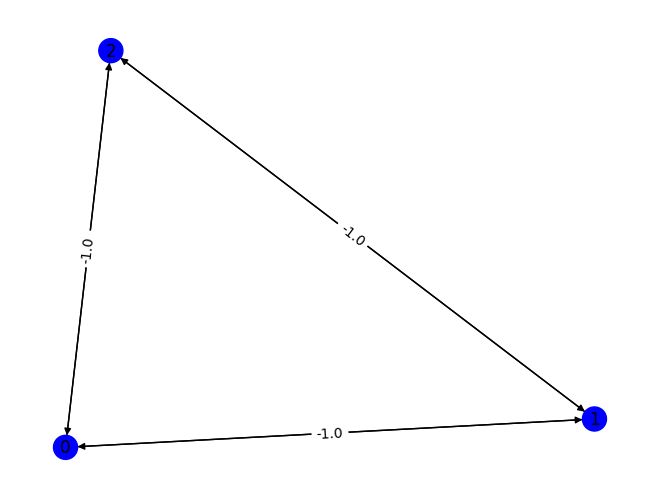

In [343]:
A0 = np.array([[0, 0, 0],
              [1, 0, 0],
              [1, 1, 0]])
At = np.transpose(A0)
A = A0 + At
A = -A
X = np.ones(A.shape[0])

generate_graph(A,X)

 The best solution found:                                                                           
 [1. 0. 0.]

 Objective function:
 -0.25


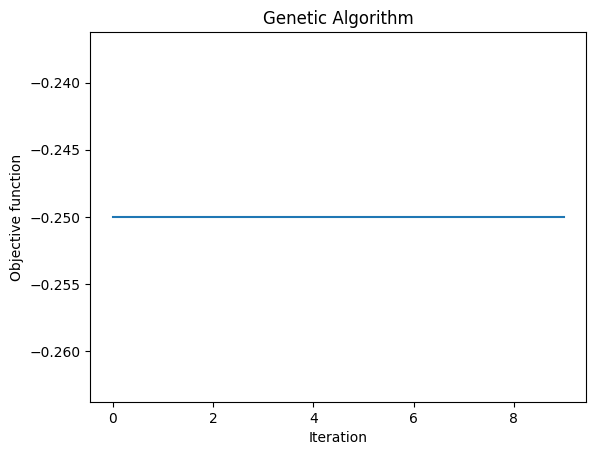

 The best solution found:                                                                           
 [1. 1. 0.]

 Objective function:
 -0.25


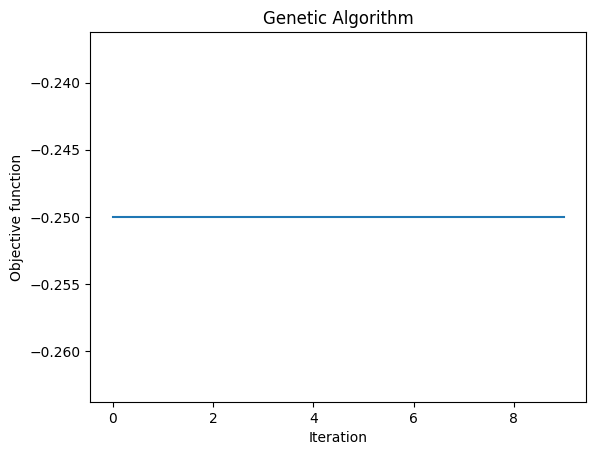

 The best solution found:                                                                           
 [1. 1. 0.]

 Objective function:
 -0.25


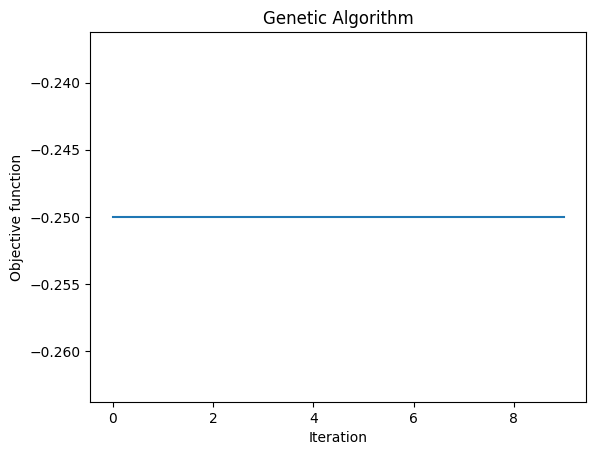

 The best solution found:                                                                           
 [1. 1. 0.]

 Objective function:
 -0.25


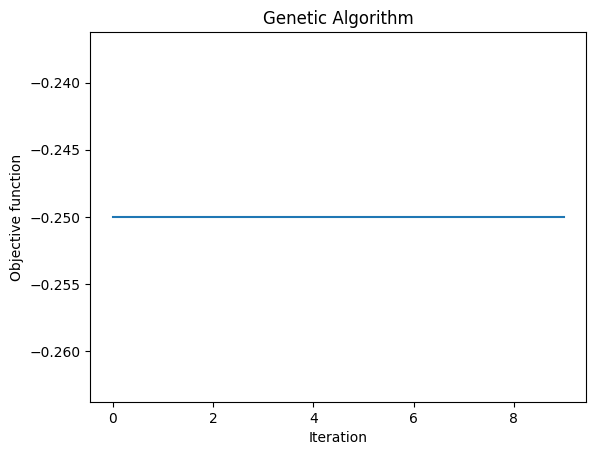

 The best solution found:                                                                           
 [0. 1. 0.]

 Objective function:
 -0.25


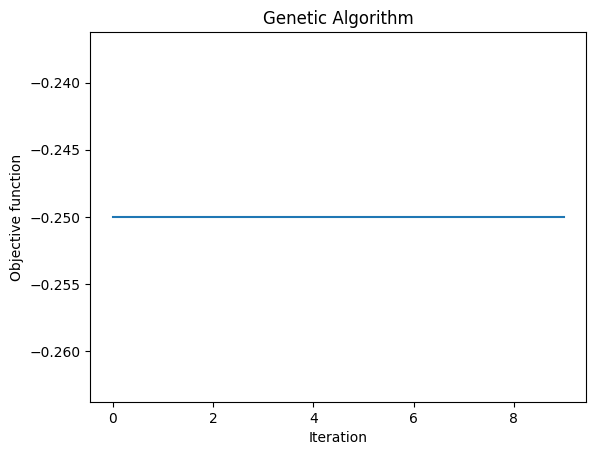

 The best solution found:                                                                           
 [1. 0. 0.]

 Objective function:
 -0.25


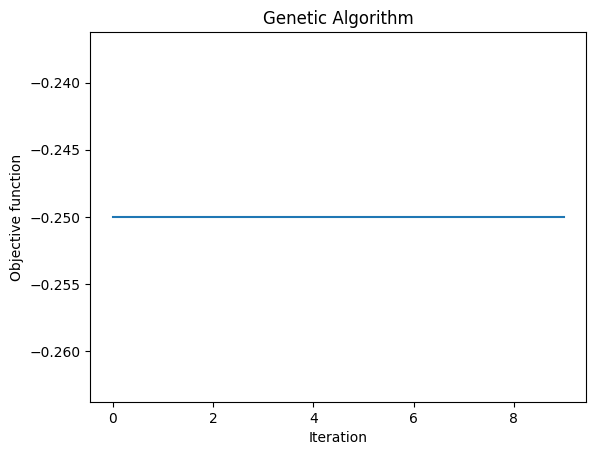

 The best solution found:                                                                           
 [1. 1. 0.]

 Objective function:
 -0.25


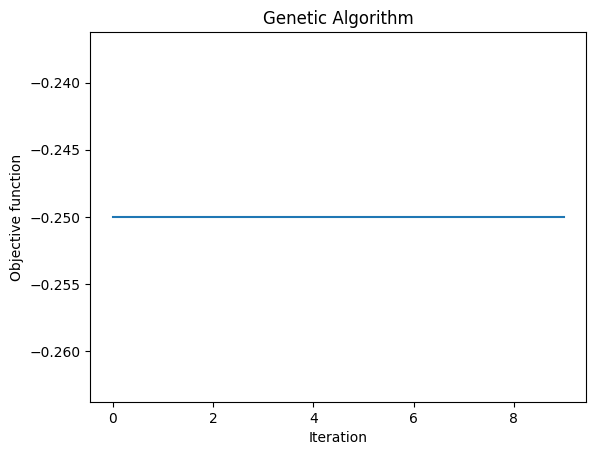

 The best solution found:                                                                           
 [0. 0. 1.]

 Objective function:
 -0.25


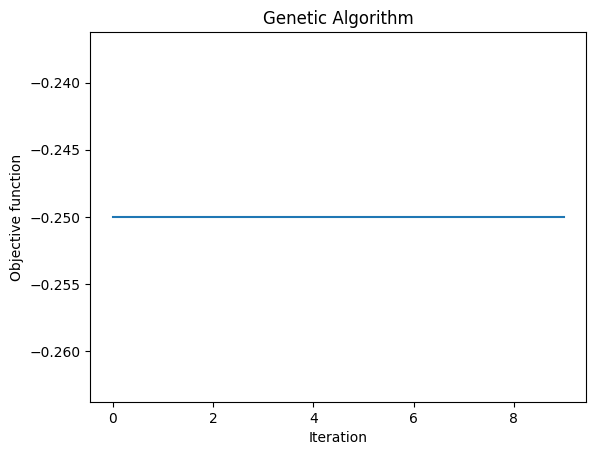

 The best solution found:                                                                           
 [0. 0. 1.]

 Objective function:
 -0.25


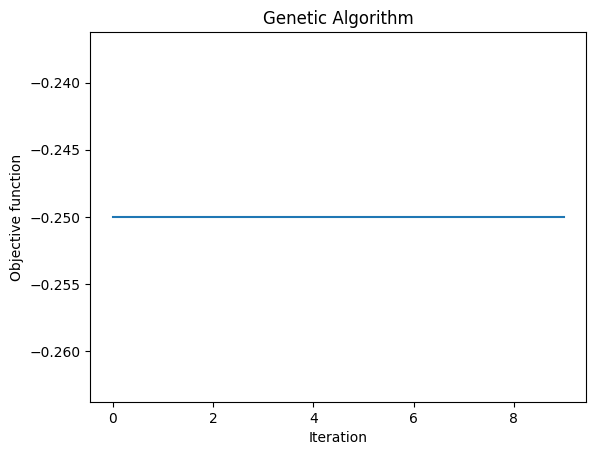

 The best solution found:                                                                           
 [1. 1. 0.]

 Objective function:
 -0.25


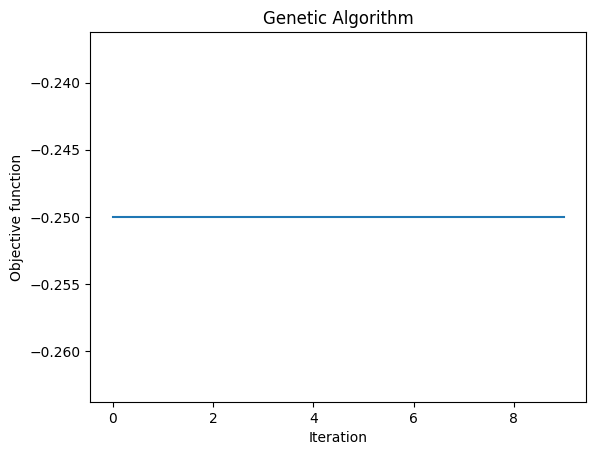

 The best solution found:                                                                           
 [1. 1. 0.]

 Objective function:
 -0.25


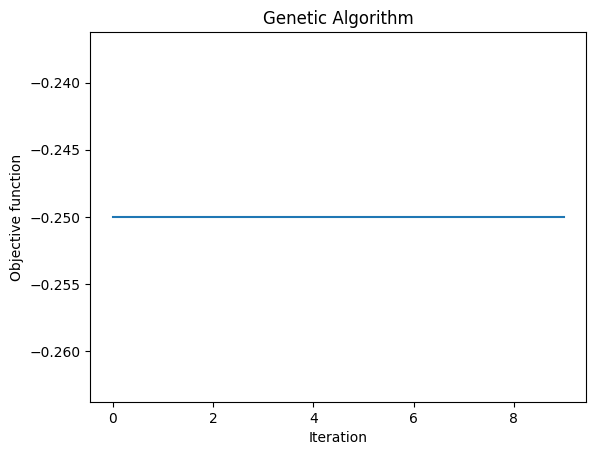

 The best solution found:                                                                           
 [0. 0. 1.]

 Objective function:
 -0.25


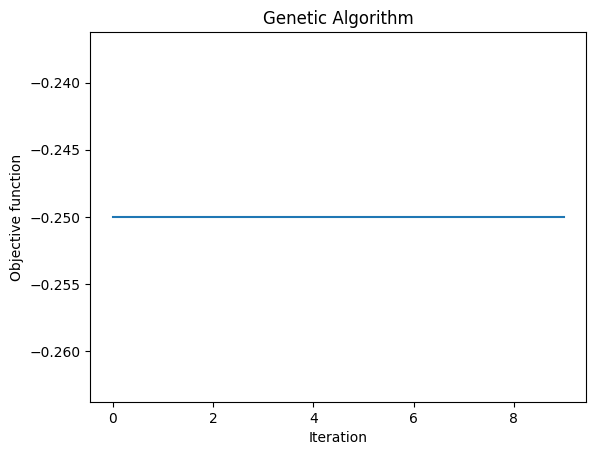

 The best solution found:                                                                           
 [0. 0. 1.]

 Objective function:
 -0.25


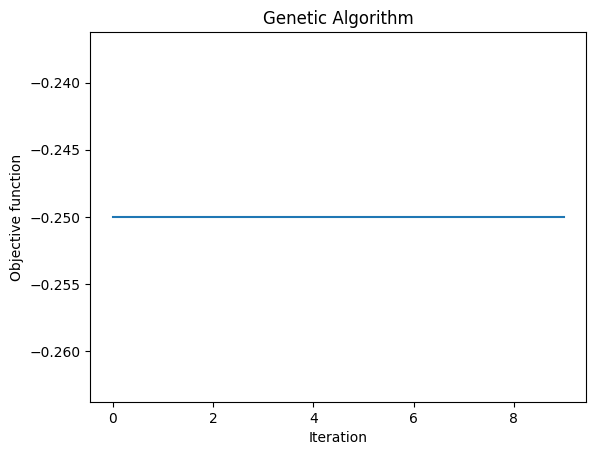

 The best solution found:                                                                           
 [0. 1. 0.]

 Objective function:
 -0.25


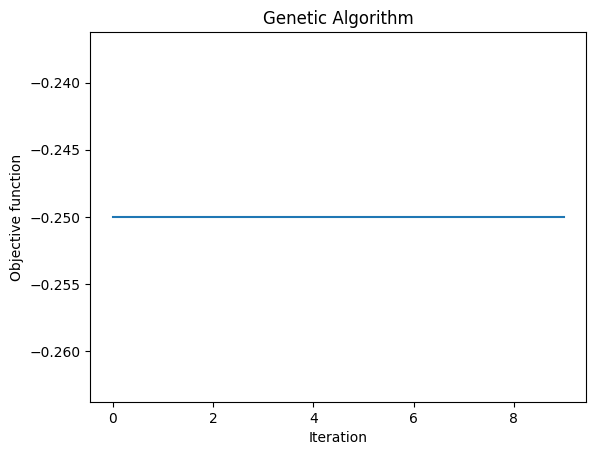

 The best solution found:                                                                           
 [1. 0. 0.]

 Objective function:
 -0.25


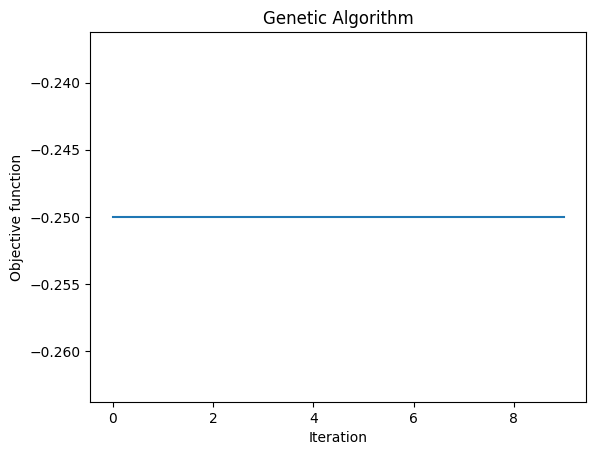

Total execution time: 3.5533013343811035 seconds


In [344]:
# Calculamos las soluciones
best_solutions = generate_solutions(A)

Solutions found:  3
-------------------
Magnetization:  -1
H: -0.25


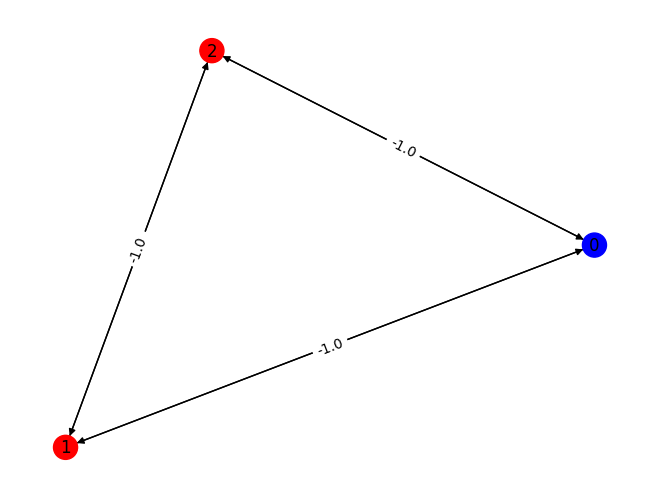

-------------------
Magnetization:  1
H: -0.25


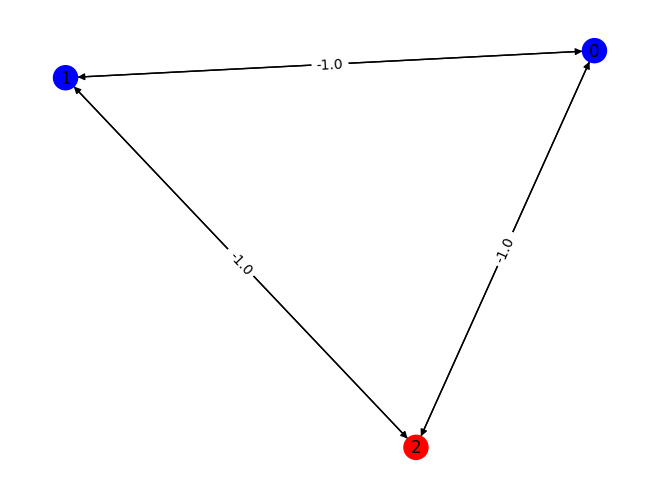

-------------------
Magnetization:  -1
H: -0.25


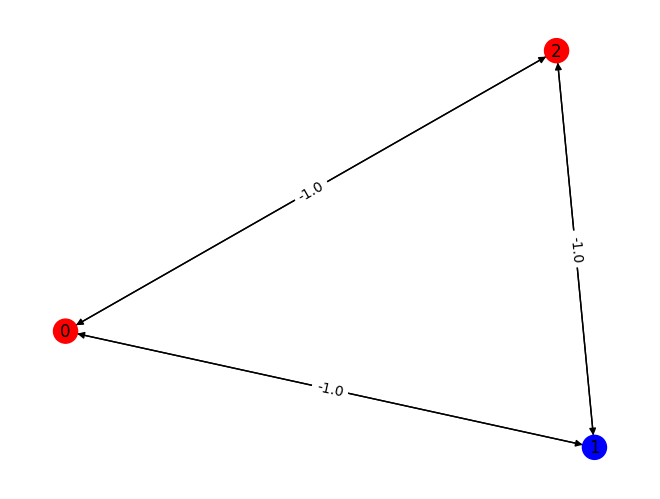

In [345]:
# Filtramos las soluciones resultantes para obtener y visualizar la de menor energía
analize_solutions(best_solutions, A)

# N = 8

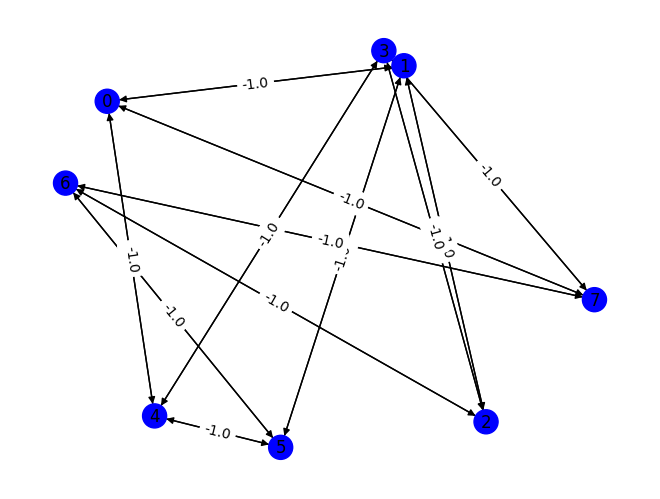

In [329]:
A0 =np.array([[0, 0, 0, 0, 0, 0, 0, 0],
              [1, 0, 0, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 0],
              [1, 0, 0, 1, 0, 0, 0, 0],
              [0, 1, 0, 0, 1, 0, 0, 0],
              [0, 0, 1, 0, 0, 1, 0, 0],
              [1, 0, 0, 1, 0, 0, 1, 0]])

At = np.transpose(A0)
A = A0 + At
A = -A
X = np.ones(A.shape[0])

generate_graph(A,X)

 The best solution found:                                                                           
 [1. 0. 1. 1. 0. 1. 0. 0.]

 Objective function:
 -2.0


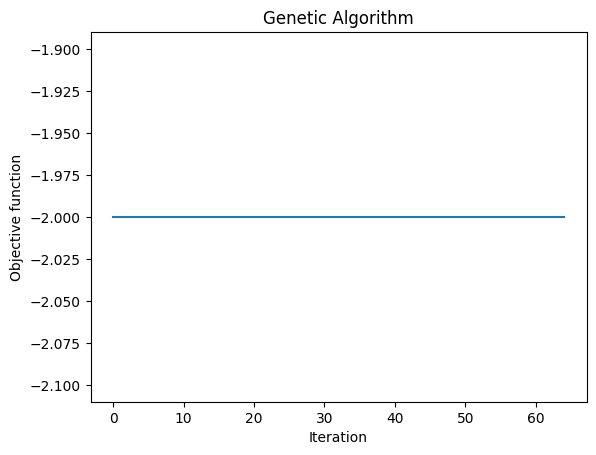

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 1. 1. 0.]

 Objective function:
 -2.0


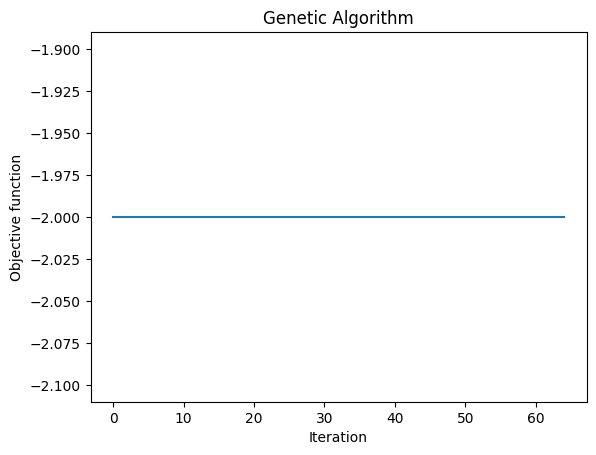

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 0. 0. 1.]

 Objective function:
 -2.0


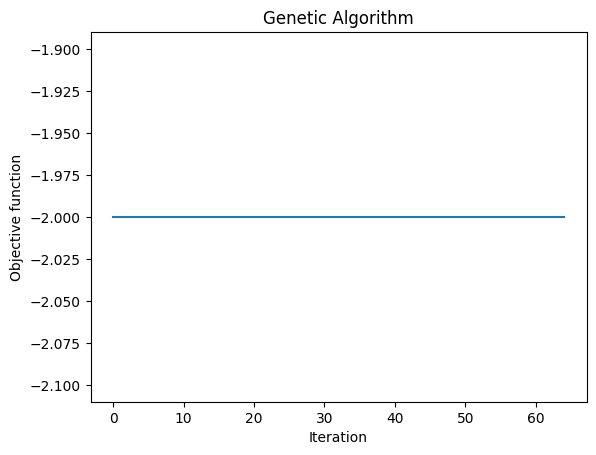

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 1. 1. 0.]

 Objective function:
 -2.0


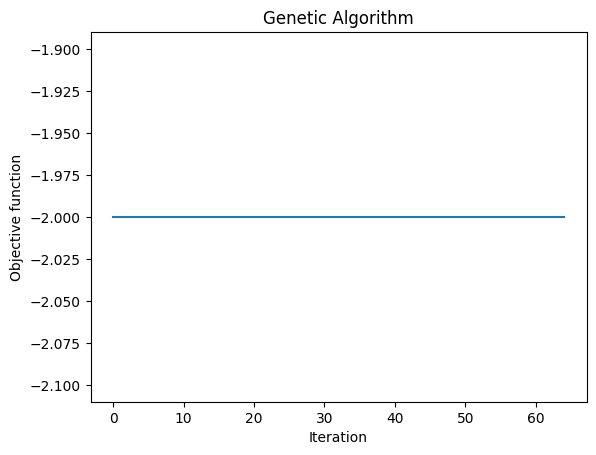

 The best solution found:                                                                           
 [1. 0. 1. 0. 0. 1. 0. 1.]

 Objective function:
 -2.0


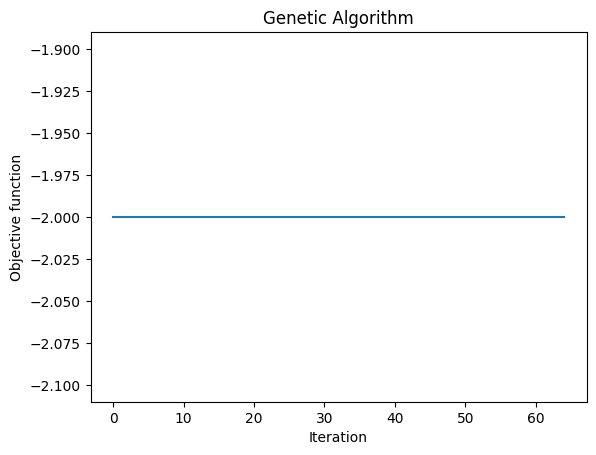

 The best solution found:                                                                           
 [0. 1. 0. 0. 1. 0. 1. 1.]

 Objective function:
 -2.0


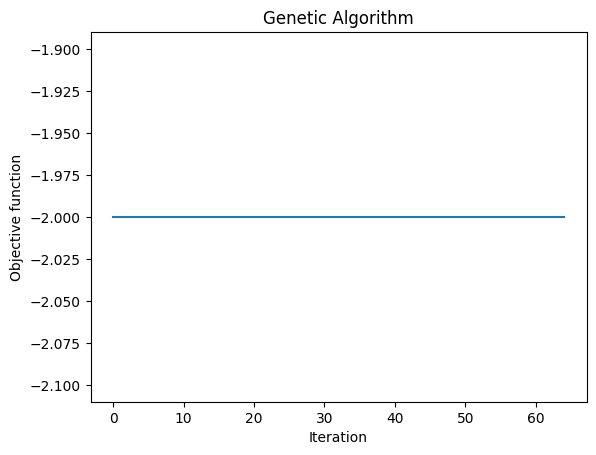

 The best solution found:                                                                           
 [1. 1. 0. 1. 0. 0. 1. 0.]

 Objective function:
 -2.0


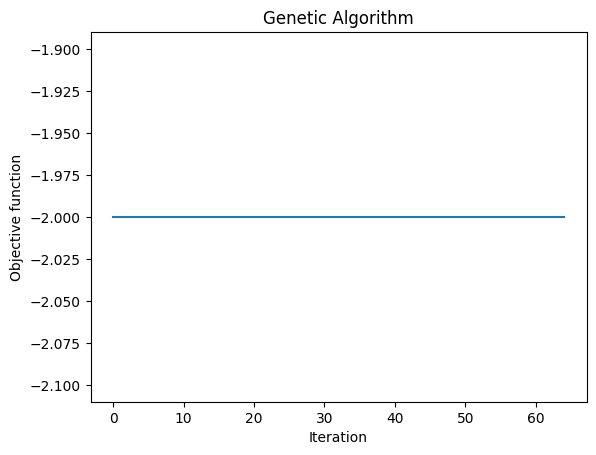

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 0. 0. 1.]

 Objective function:
 -2.0


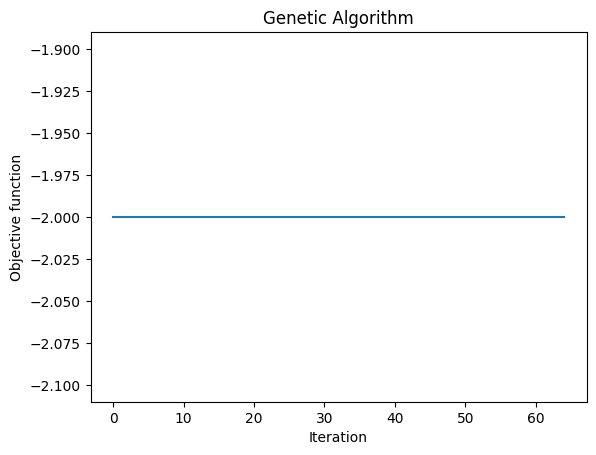

 The best solution found:                                                                           
 [1. 1. 0. 1. 0. 0. 1. 0.]

 Objective function:
 -2.0


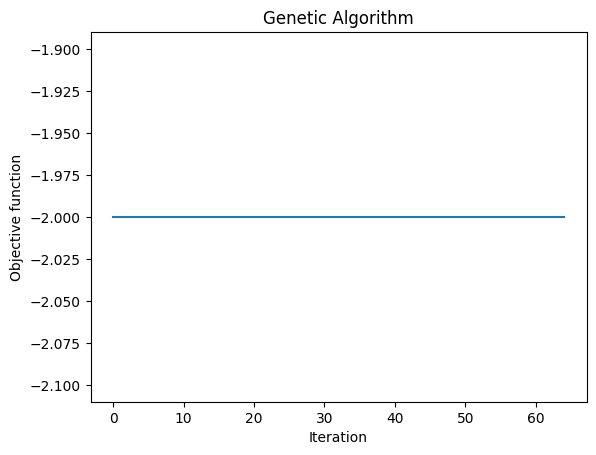

 The best solution found:                                                                           
 [0. 1. 0. 0. 1. 0. 1. 1.]

 Objective function:
 -2.0


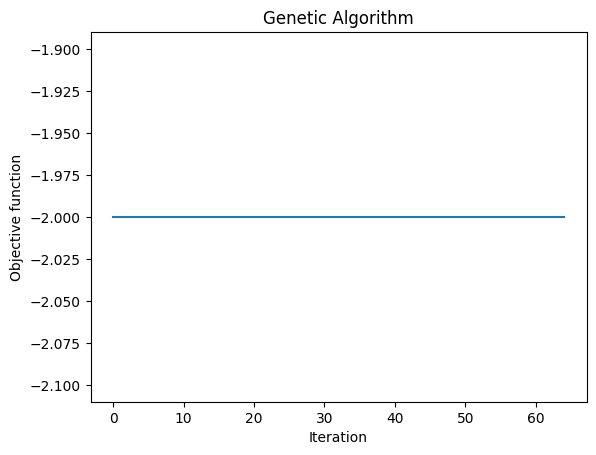

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 0. 0. 1.]

 Objective function:
 -2.0


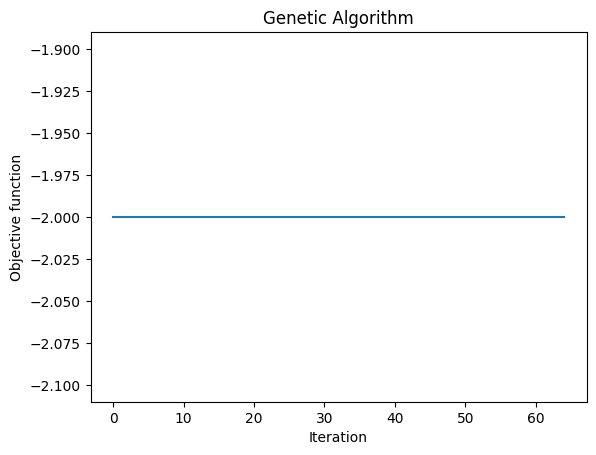

 The best solution found:                                                                           
 [1. 0. 1. 1. 0. 1. 0. 0.]

 Objective function:
 -2.0


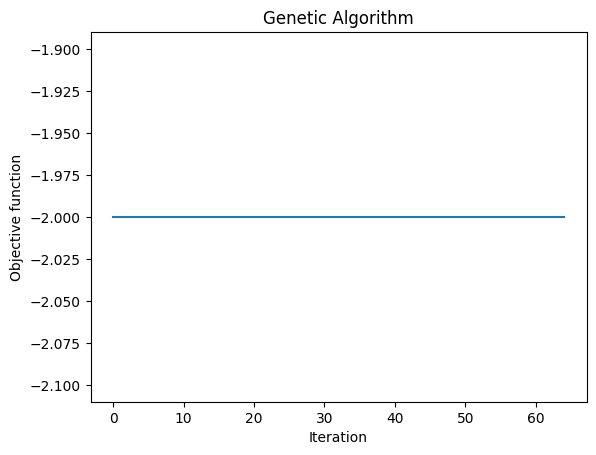

 The best solution found:                                                                           
 [1. 0. 1. 1. 0. 1. 0. 0.]

 Objective function:
 -2.0


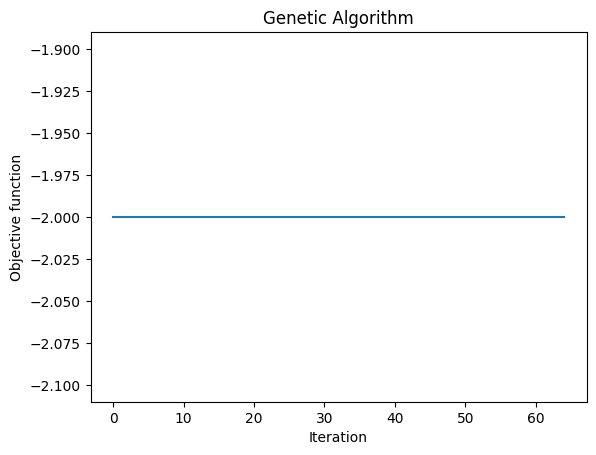

 The best solution found:                                                                           
 [1. 0. 1. 1. 0. 1. 0. 0.]

 Objective function:
 -2.0


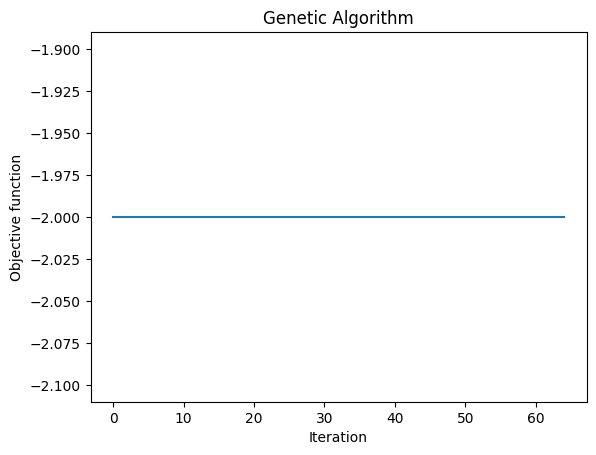

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 1. 1. 0.]

 Objective function:
 -2.0


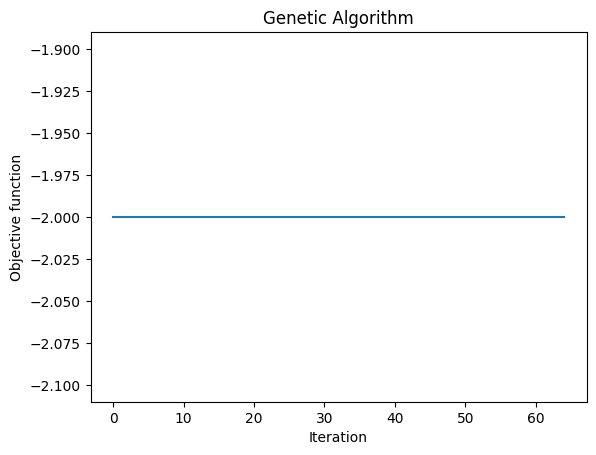

 The best solution found:                                                                           
 [0. 1. 0. 0. 1. 0. 1. 1.]

 Objective function:
 -2.0


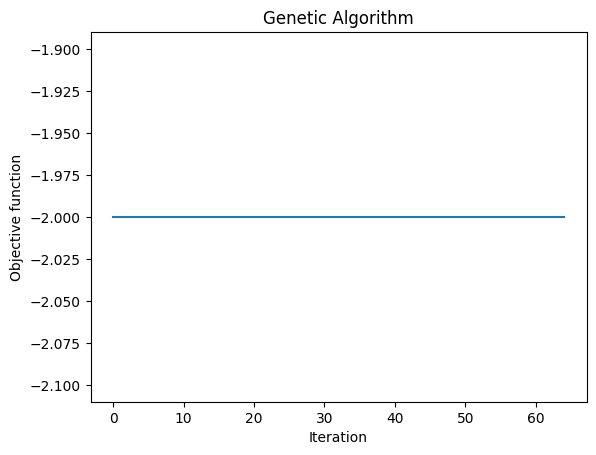

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 0. 0. 1.]

 Objective function:
 -2.0


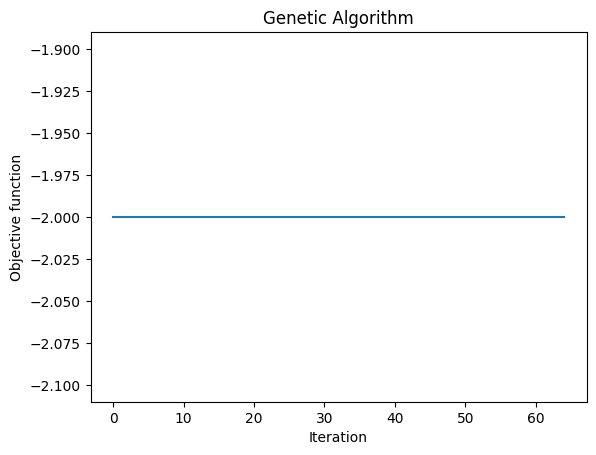

 The best solution found:                                                                           
 [1. 0. 1. 1. 0. 1. 0. 0.]

 Objective function:
 -2.0


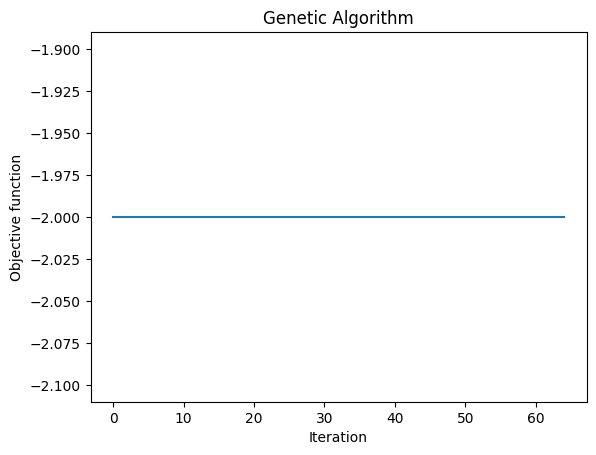

 The best solution found:                                                                           
 [1. 0. 1. 1. 0. 1. 0. 0.]

 Objective function:
 -2.0


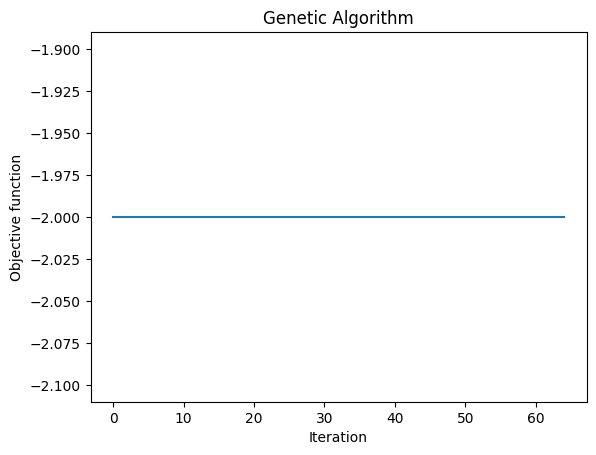

 The best solution found:                                                                           
 [0. 1. 0. 1. 1. 0. 1. 0.]

 Objective function:
 -2.0


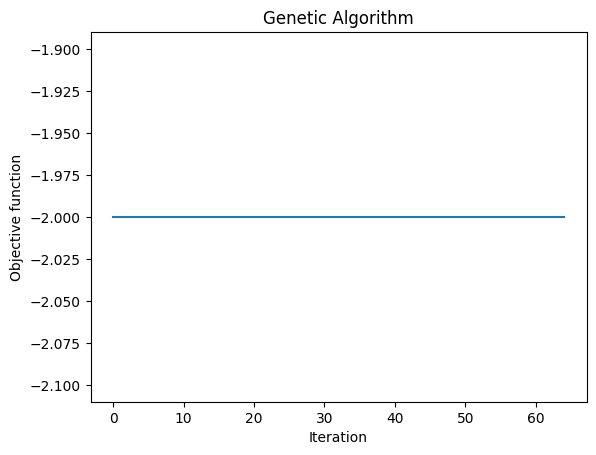

 The best solution found:                                                                           
 [0. 1. 0. 1. 1. 0. 1. 0.]

 Objective function:
 -2.0


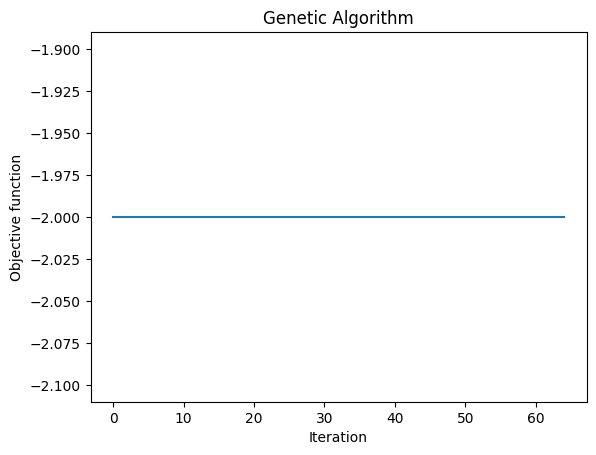

 The best solution found:                                                                           
 [0. 1. 0. 0. 1. 0. 1. 1.]

 Objective function:
 -2.0


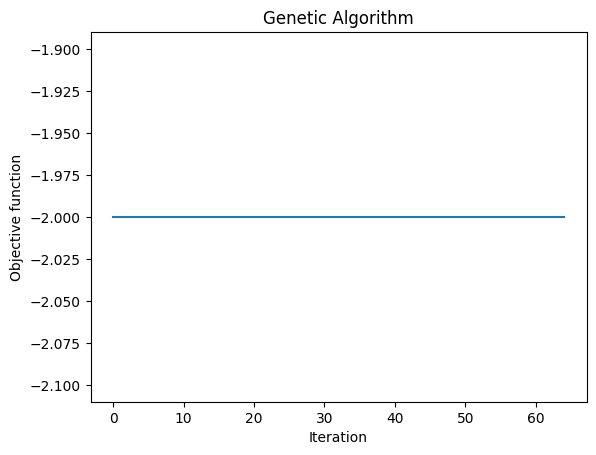

 The best solution found:                                                                           
 [1. 1. 0. 1. 0. 0. 1. 0.]

 Objective function:
 -2.0


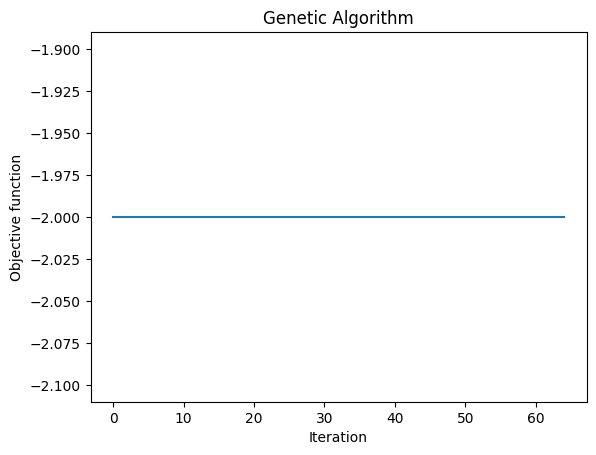

 The best solution found:                                                                           
 [0. 0. 1. 0. 1. 1. 0. 1.]

 Objective function:
 -2.0


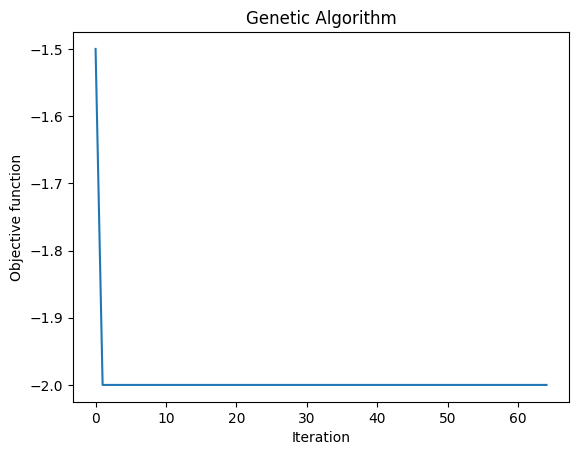

 The best solution found:                                                                           
 [1. 0. 1. 0. 0. 1. 0. 1.]

 Objective function:
 -2.0


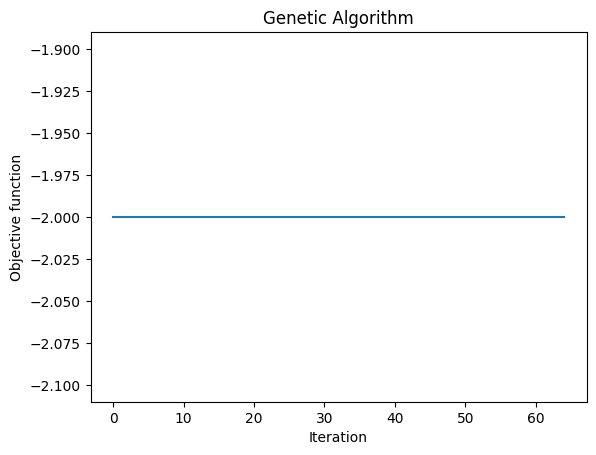

 The best solution found:                                                                           
 [1. 1. 0. 1. 0. 0. 1. 0.]

 Objective function:
 -2.0


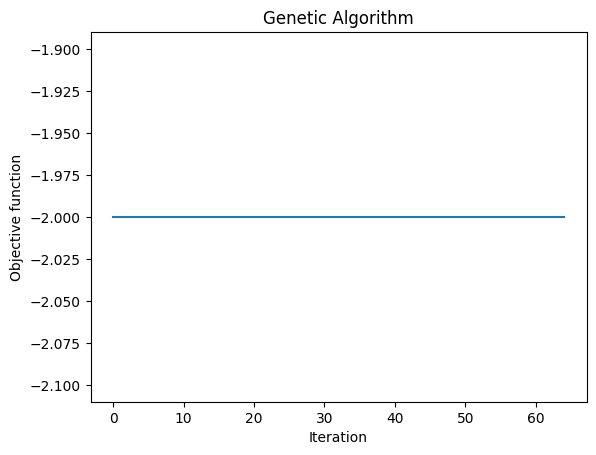

 The best solution found:                                                                           
 [0. 0. 1. 0. 1. 1. 0. 1.]

 Objective function:
 -2.0


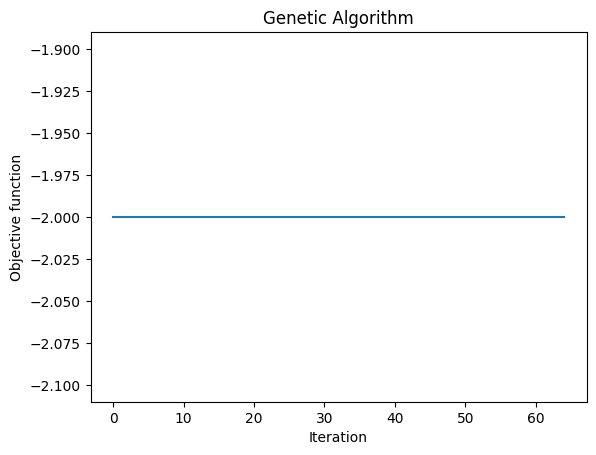

 The best solution found:                                                                           
 [0. 0. 1. 0. 1. 1. 0. 1.]

 Objective function:
 -2.0


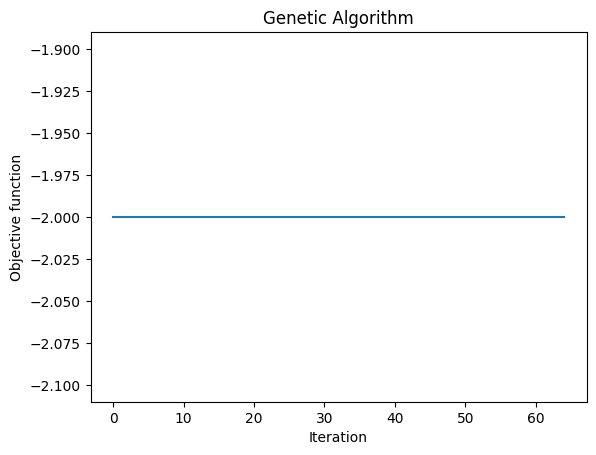

 The best solution found:                                                                           
 [1. 0. 1. 0. 0. 1. 0. 1.]

 Objective function:
 -2.0


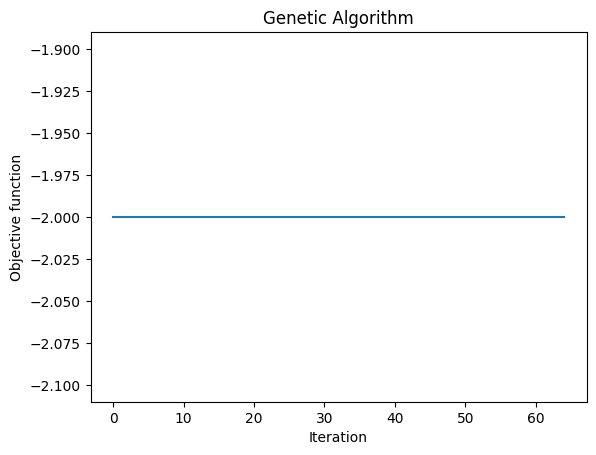

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 1. 1. 0.]

 Objective function:
 -2.0


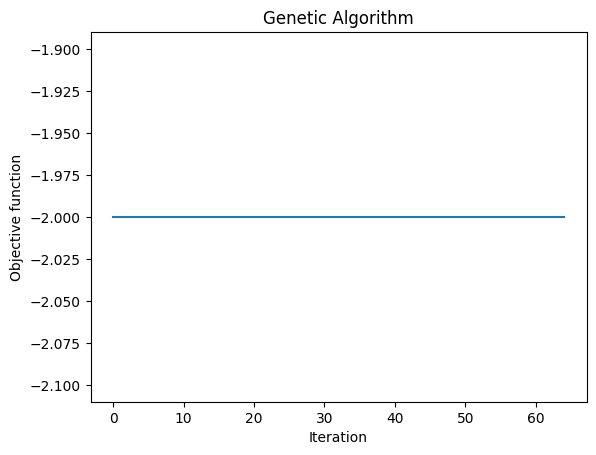

 The best solution found:                                                                           
 [1. 1. 0. 1. 0. 0. 1. 0.]

 Objective function:
 -2.0


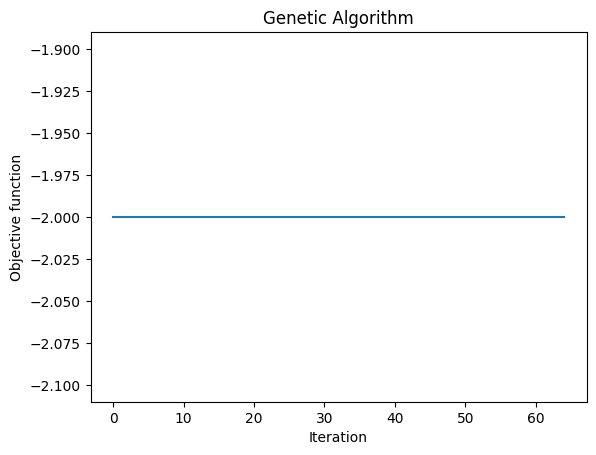

 The best solution found:                                                                           
 [0. 0. 1. 0. 1. 1. 0. 1.]

 Objective function:
 -2.0


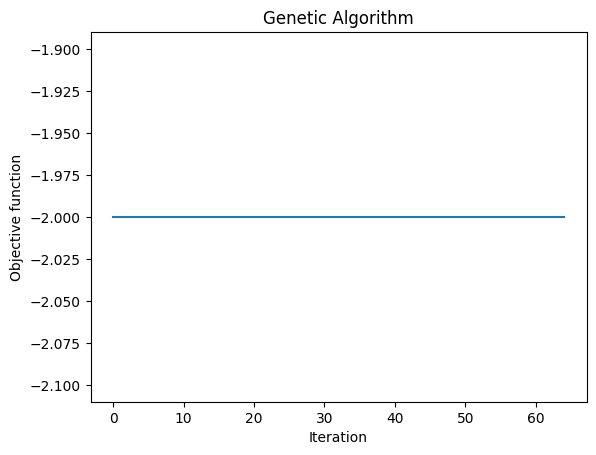

 The best solution found:                                                                           
 [1. 0. 1. 0. 0. 1. 0. 1.]

 Objective function:
 -2.0


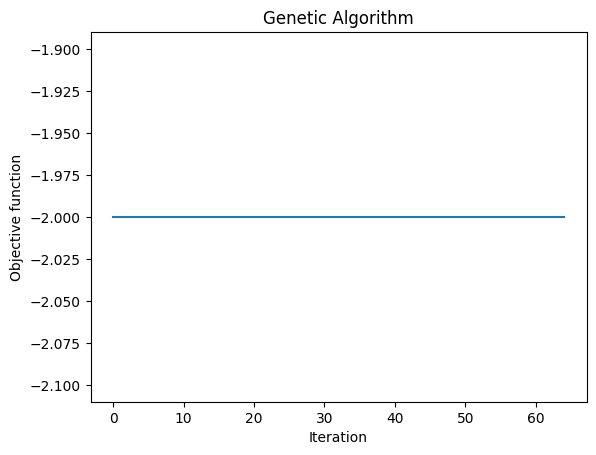

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 1. 1. 0.]

 Objective function:
 -2.0


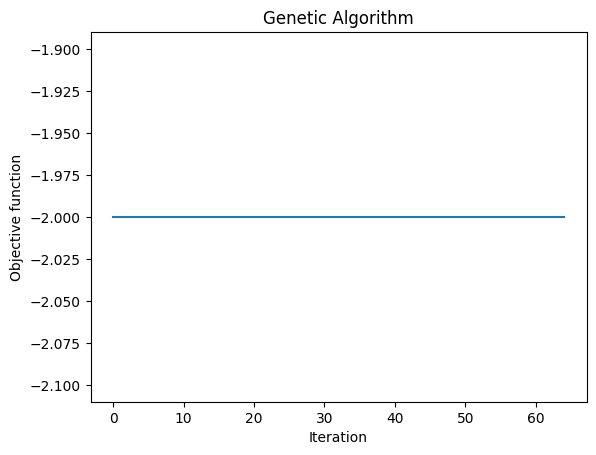

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 1. 1. 0.]

 Objective function:
 -2.0


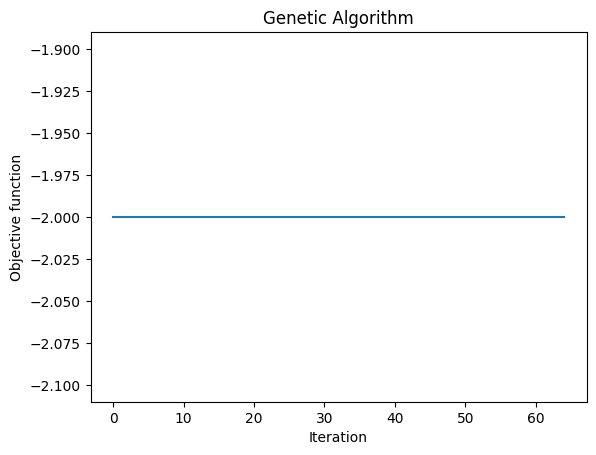

 The best solution found:                                                                           
 [0. 1. 0. 0. 1. 0. 1. 1.]

 Objective function:
 -2.0


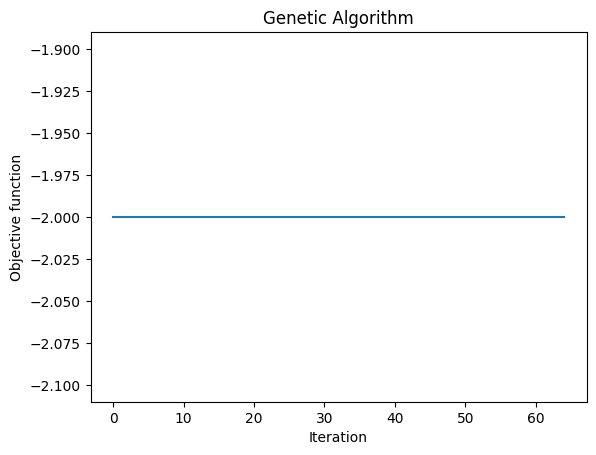

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 0. 0. 1.]

 Objective function:
 -2.0


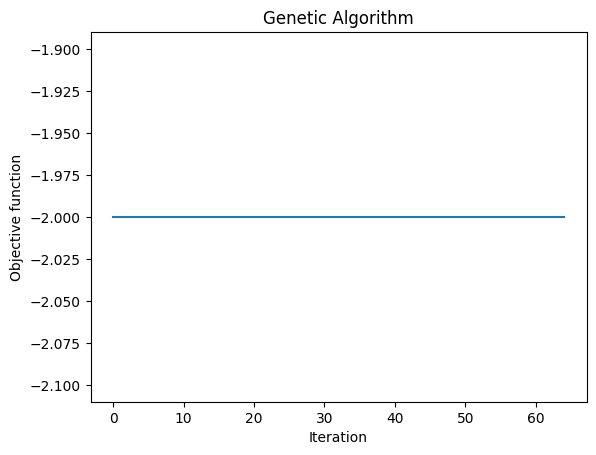

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 1. 1. 0.]

 Objective function:
 -2.0


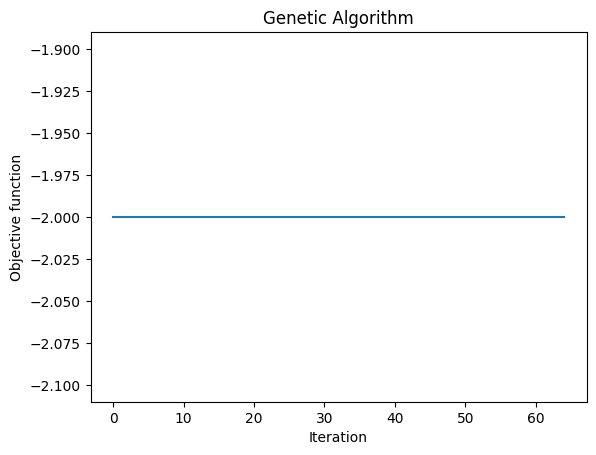

 The best solution found:                                                                           
 [0. 1. 0. 1. 1. 0. 1. 0.]

 Objective function:
 -2.0


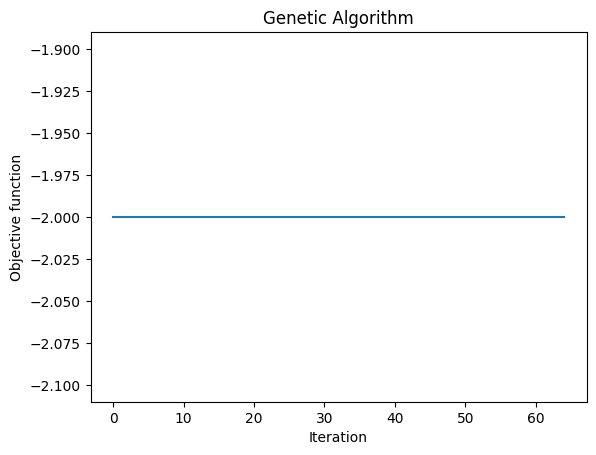

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 1. 1. 0.]

 Objective function:
 -2.0


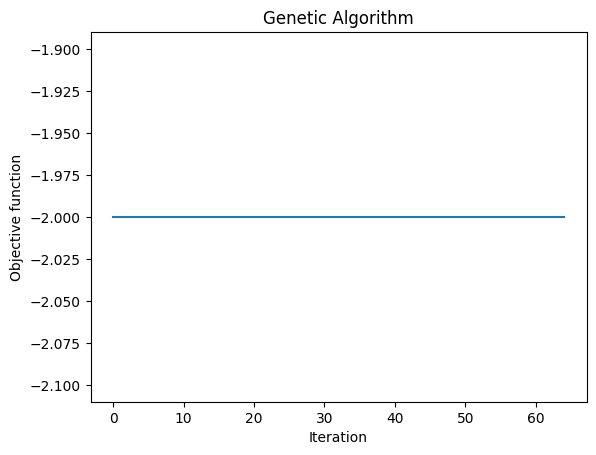

Total execution time: 32.44830870628357 seconds


In [330]:
# Calculamos las soluciones
best_solutions = generate_solutions(A)

Solutions found:  4
-------------------
Magnetization:  0
H: -2.0


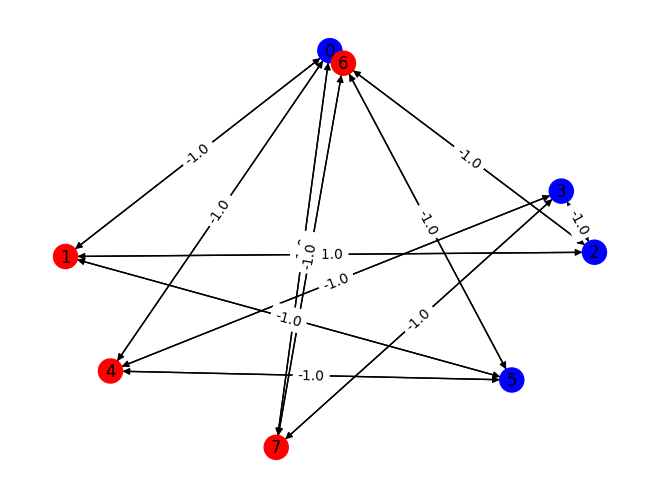

-------------------
Magnetization:  0
H: -2.0


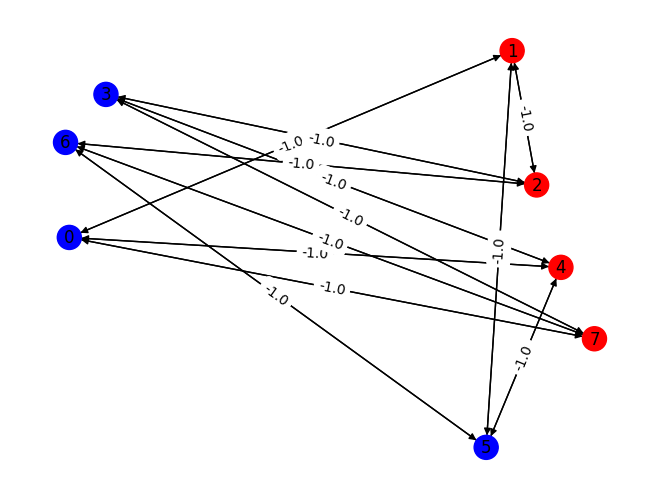

-------------------
Magnetization:  0
H: -2.0


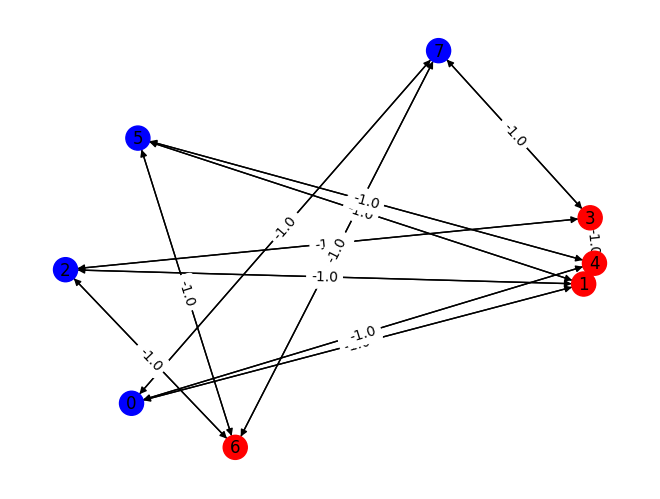

-------------------
Magnetization:  0
H: -2.0


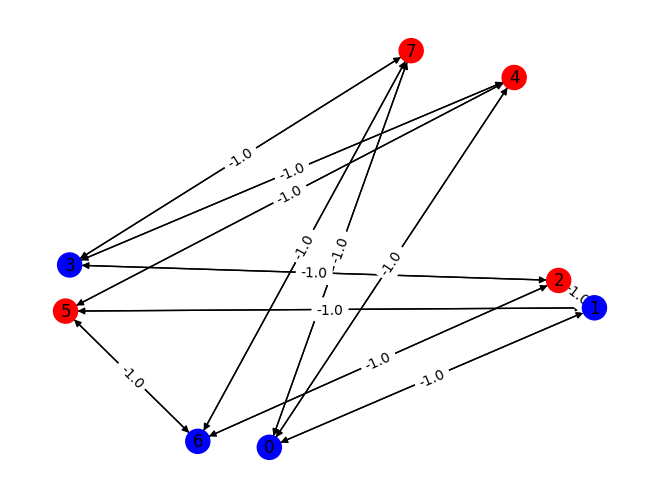

In [331]:
# Filtramos las soluciones resultantes para obtener y visualizar la de menor energía
analize_solutions(best_solutions, A)

### Random N=20 configuration

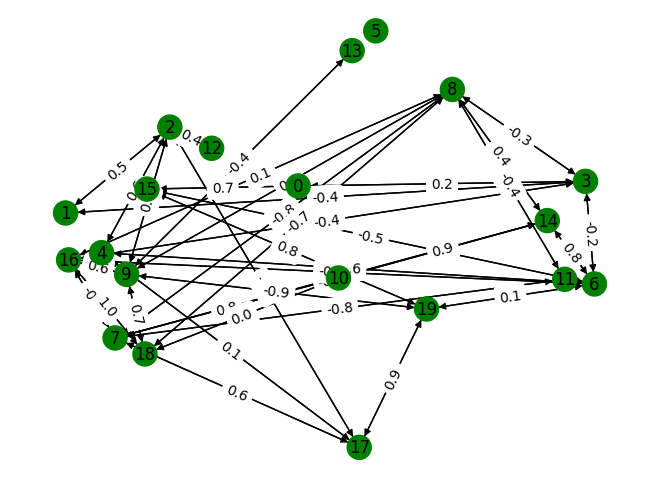

In [307]:
# Definimos la matriz de adyacencia
A0 = np.random.uniform(-1,1,(20,20))
for i in range(A0.shape[0]):
    for j in range(i, A0.shape[0]):
        A0[i,j]=0
        r = np.random.rand()
        if r<0.8:
            A0[j,i]=0
        
At = np.transpose(A0)
A = A0 + At
#A = -A
X = np.ones(A.shape[0])

# Ploteamos el grafo de configuración
generate_graph(A,X)

In [ ]:
# Calculamos las soluciones
best_solutions = generate_solutions(A)

 The best solution found:                                                                           
 [1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]

 Objective function:
 -3.8996040249374504


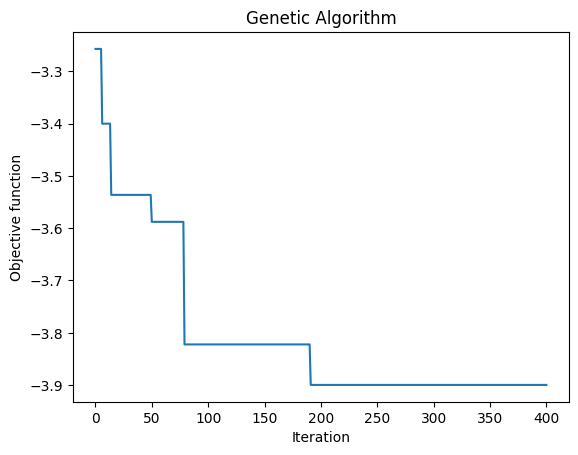

 The best solution found:                                                                           
 [1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]

 Objective function:
 -3.8996040249374504


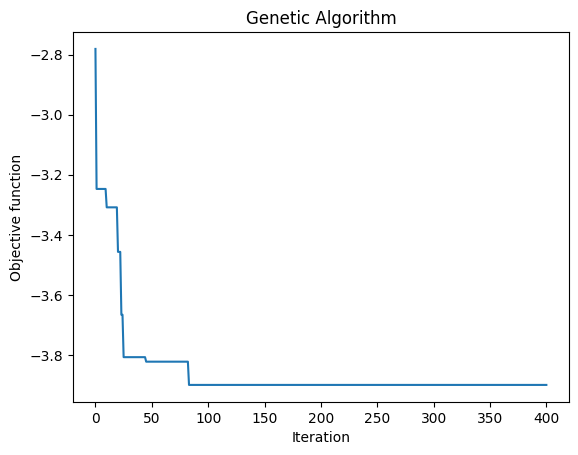

 The best solution found:                                                                           
 [0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0.]

 Objective function:
 -3.8996040249374504


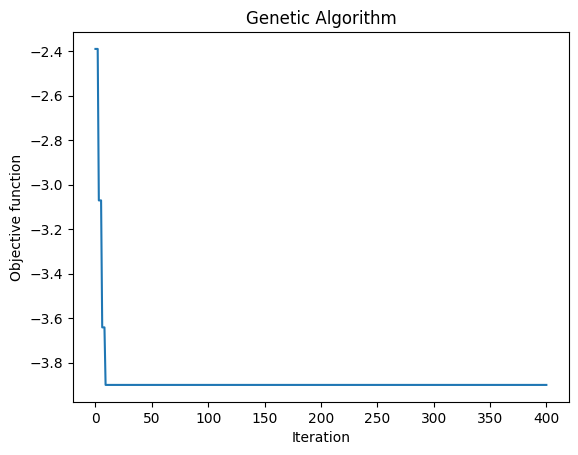

 The best solution found:                                                                           
 [0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0.]

 Objective function:
 -3.8996040249374504


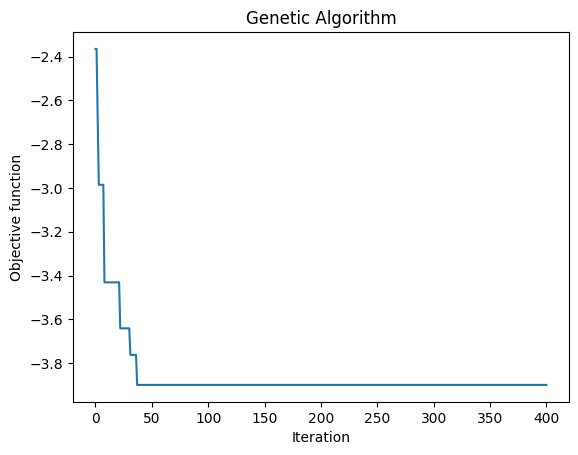

 The best solution found:                                                                           
 [1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]

 Objective function:
 -3.8996040249374504


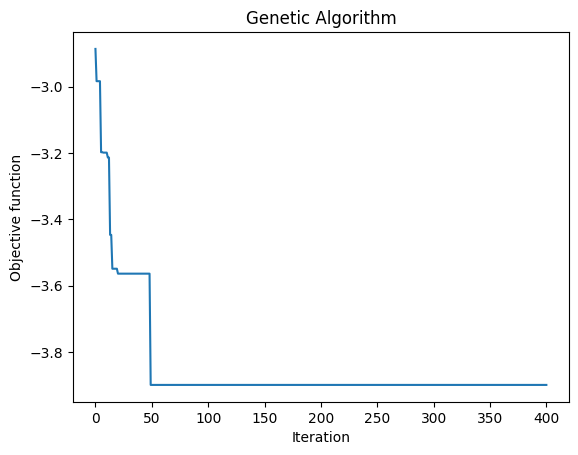

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.]

 Objective function:
 -3.822214277884155


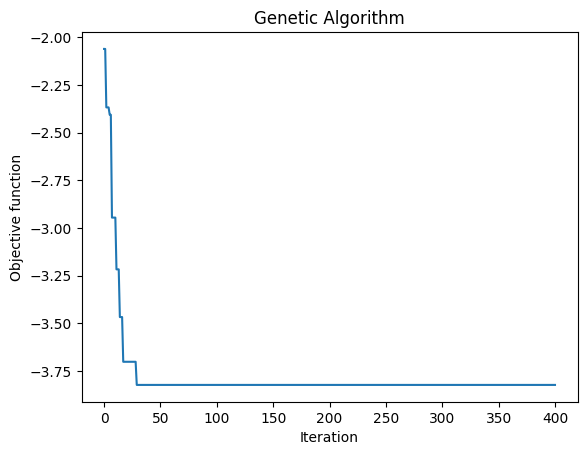

 The best solution found:                                                                           
 [1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]

 Objective function:
 -3.8996040249374504


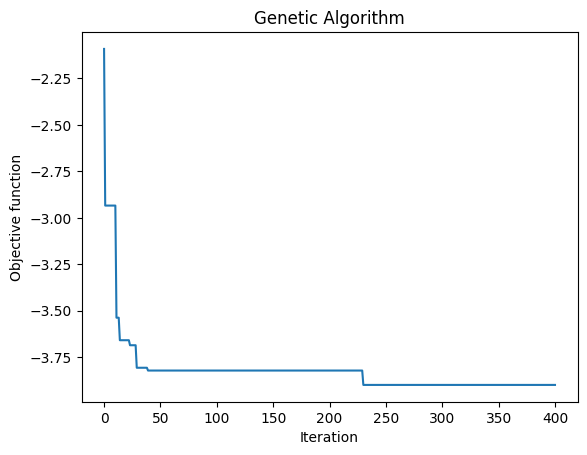

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.]

 Objective function:
 -3.822214277884155


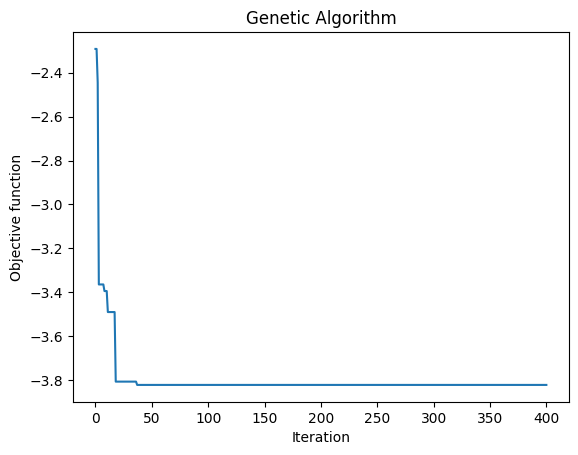

||||||||||||||||||||||||__________________________ 47.2% GA is running...

KeyboardInterrupt: 

In [304]:
# Filtramos las soluciones resultantes para obtener y visualizar la de menor energía
analize_solutions(best_solutions, A)

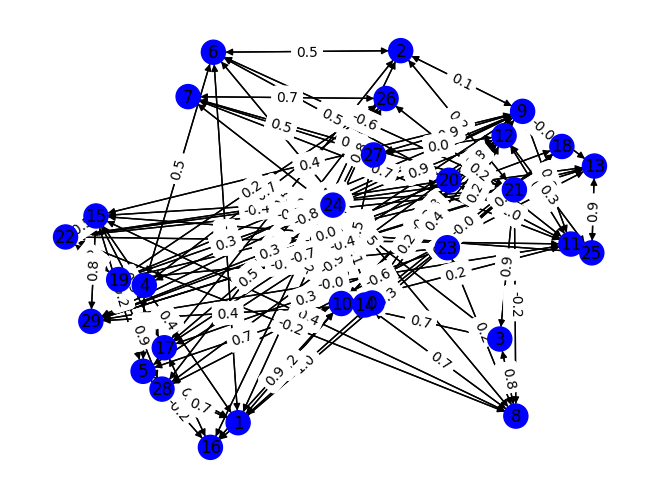

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


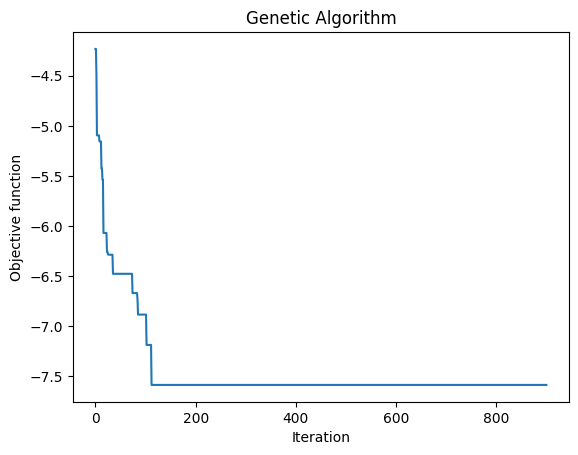

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1.]

 Objective function:
 -7.466156803647695


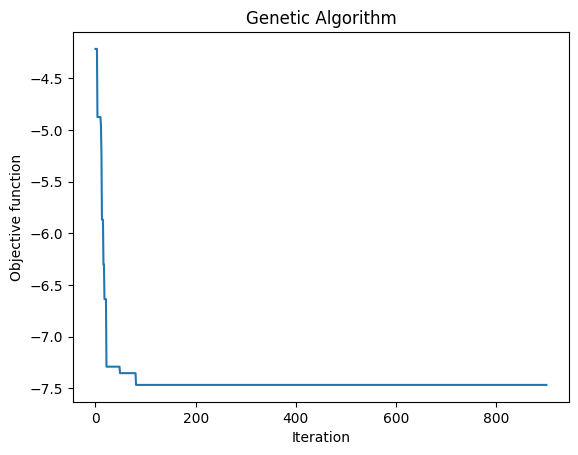

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


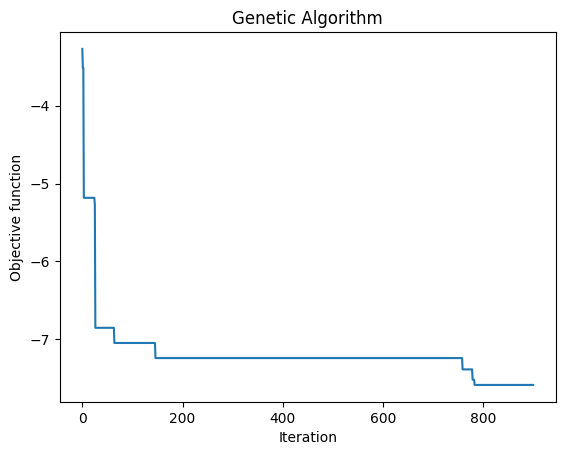

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


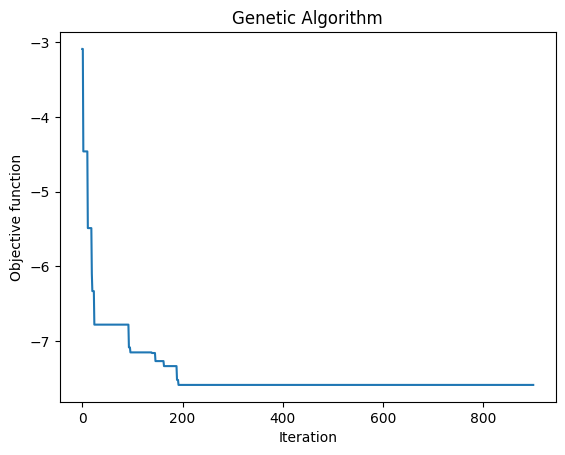

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0.]

 Objective function:
 -7.559373826844969


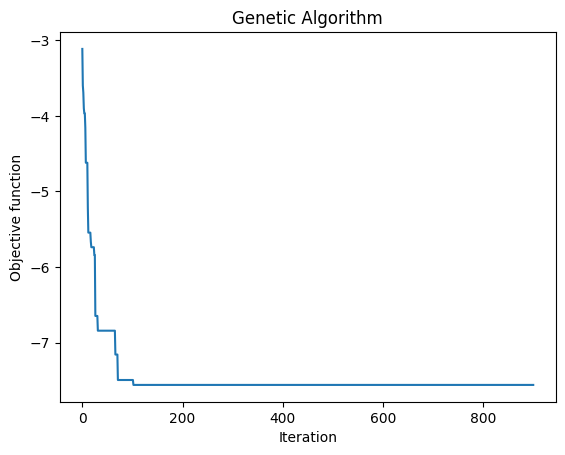

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


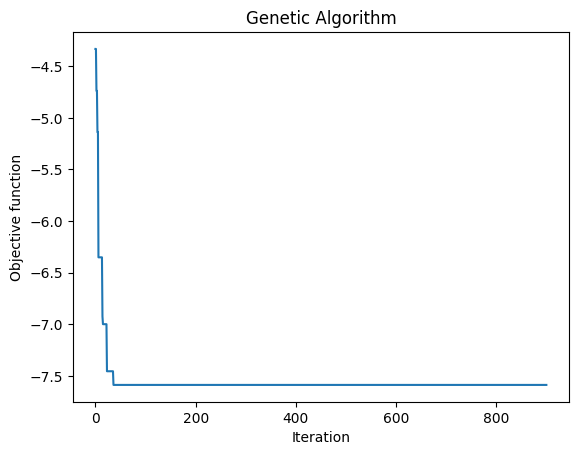

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


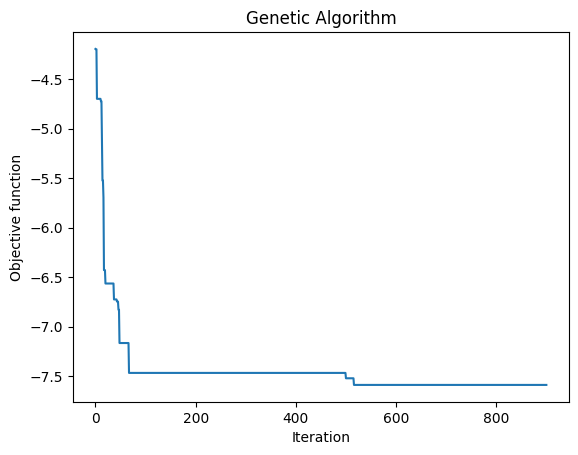

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


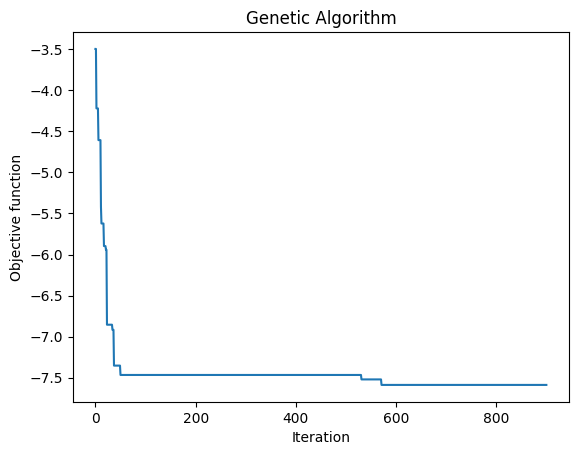

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1.]

 Objective function:
 -7.559373826844969


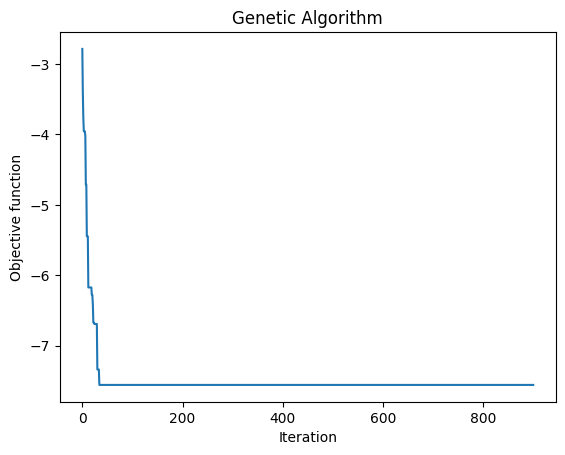

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


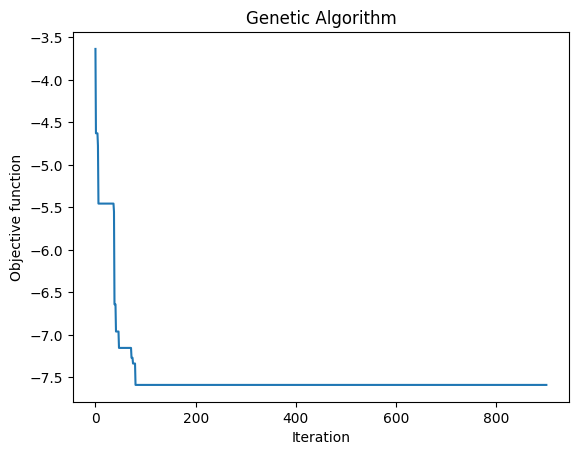

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


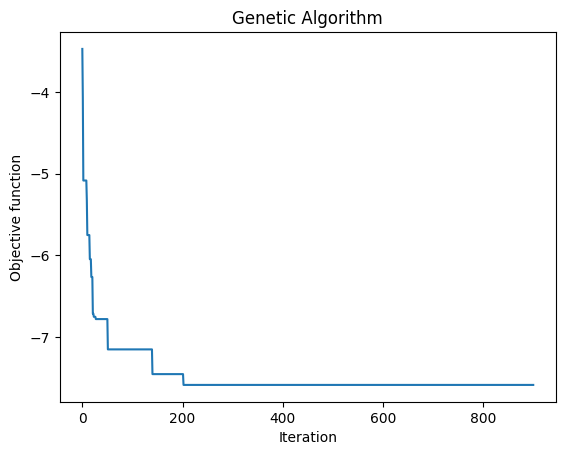

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


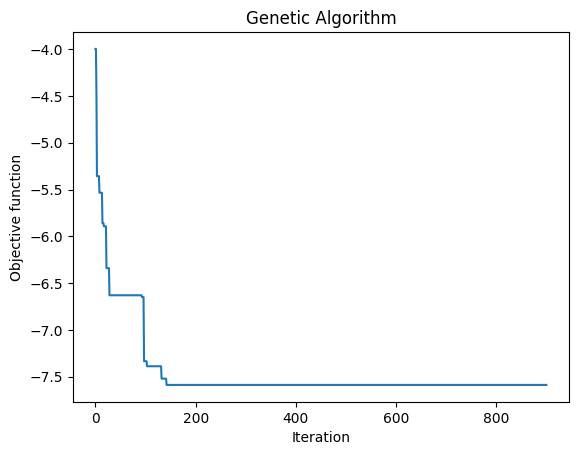

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0.]

 Objective function:
 -7.559373826844969


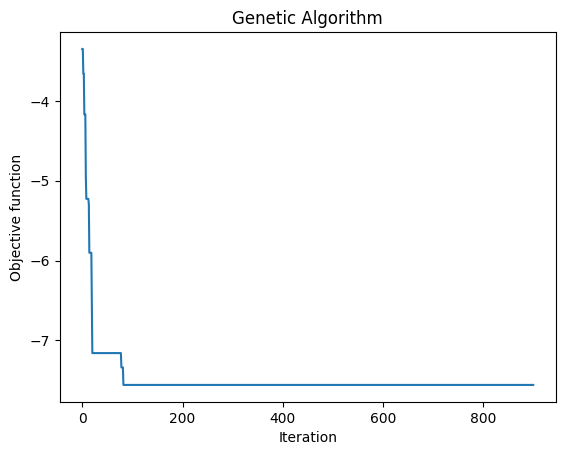

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0.]

 Objective function:
 -7.559373826844969


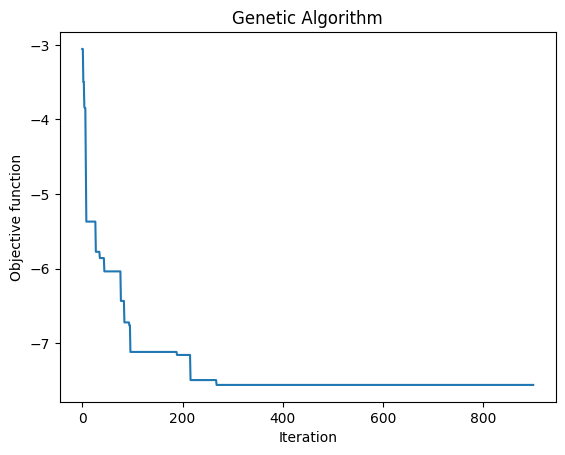

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


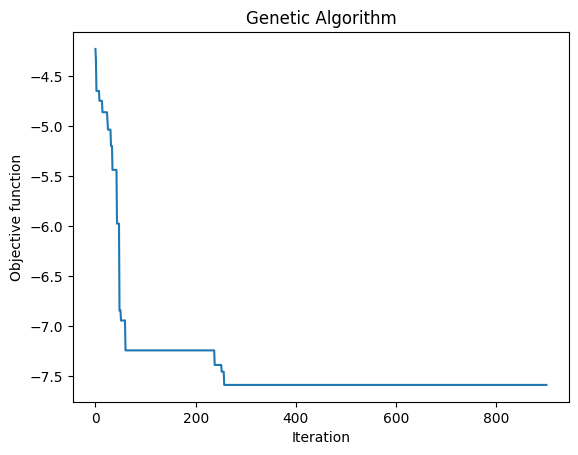

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1.]

 Objective function:
 -7.559373826844969


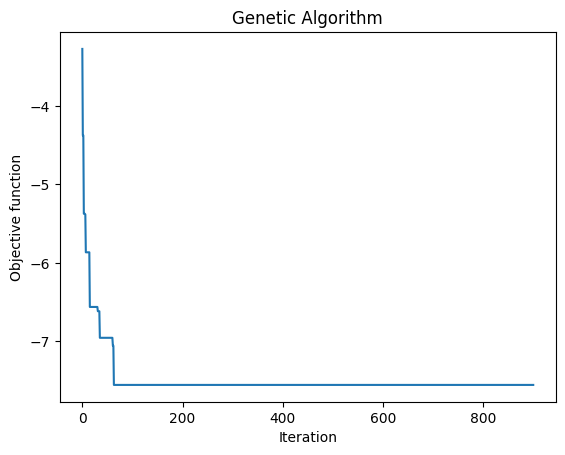

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1.]

 Objective function:
 -7.466156803647695


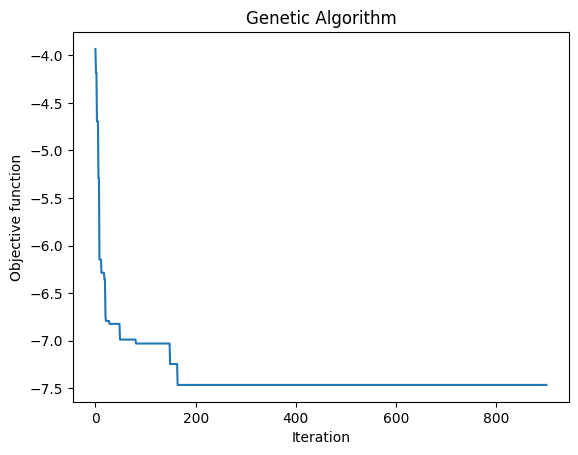

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0.]

 Objective function:
 -7.559373826844969


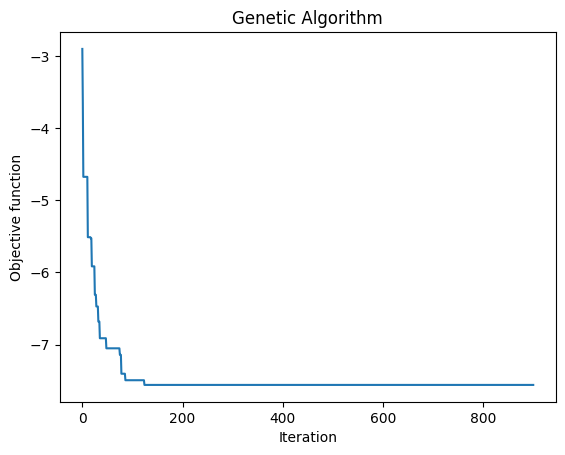

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1.]

 Objective function:
 -7.466156803647695


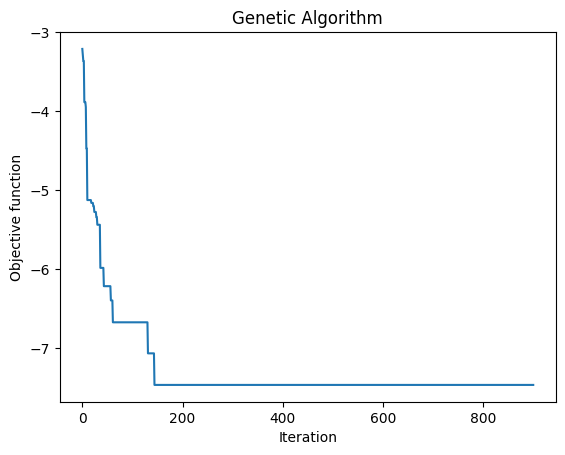

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1.]

 Objective function:
 -7.559373826844969


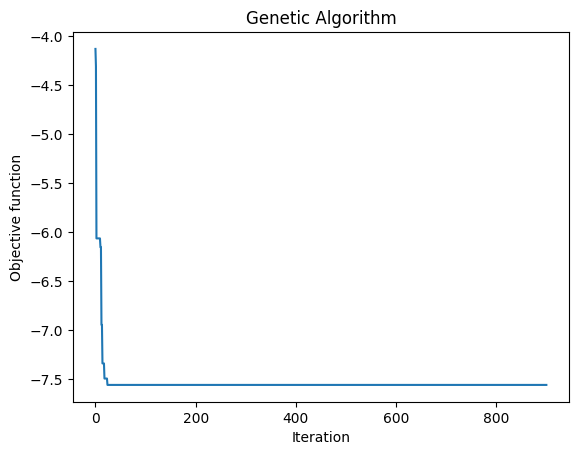

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


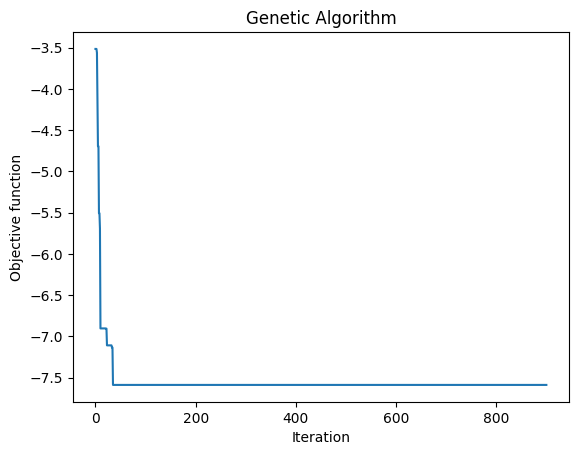

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1.]

 Objective function:
 -7.559373826844969


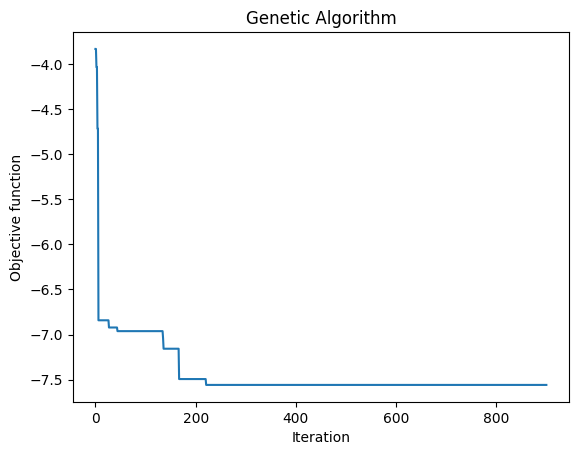

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0.]

 Objective function:
 -7.559373826844969


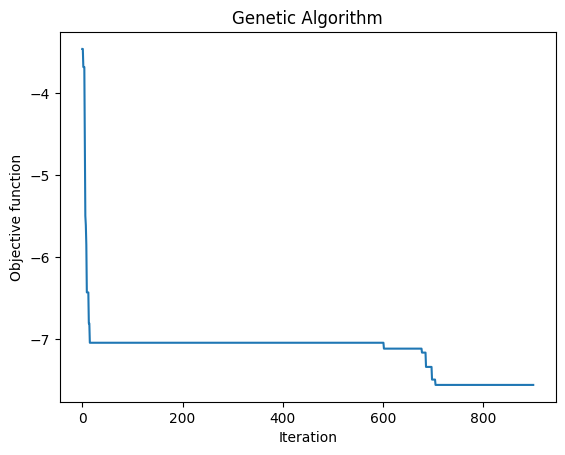

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


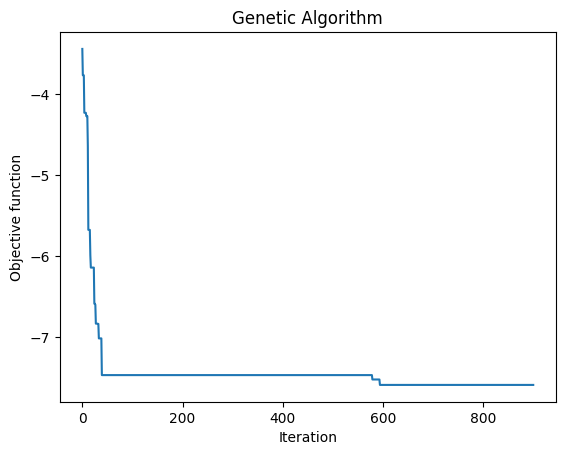

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1.]

 Objective function:
 -7.559373826844969


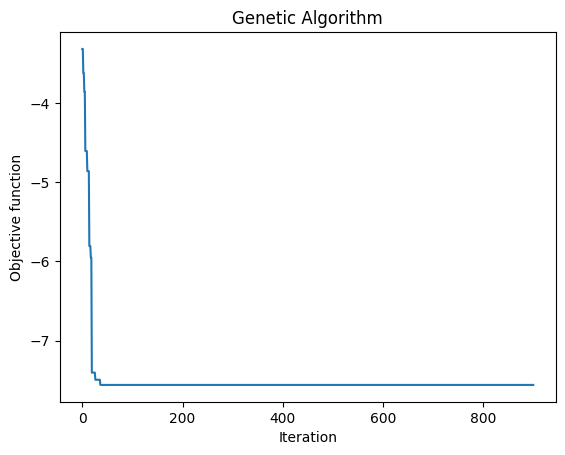

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


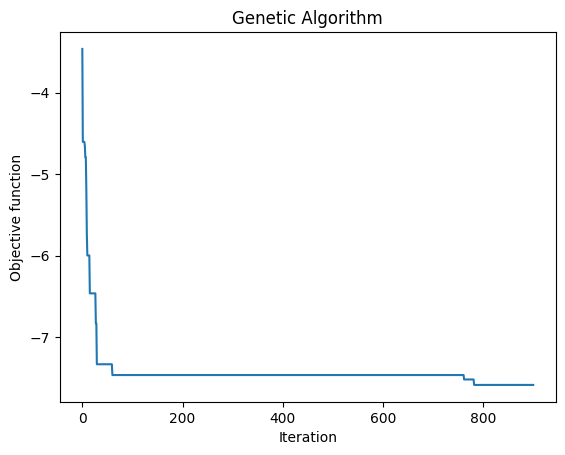

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1.]

 Objective function:
 -7.466156803647695


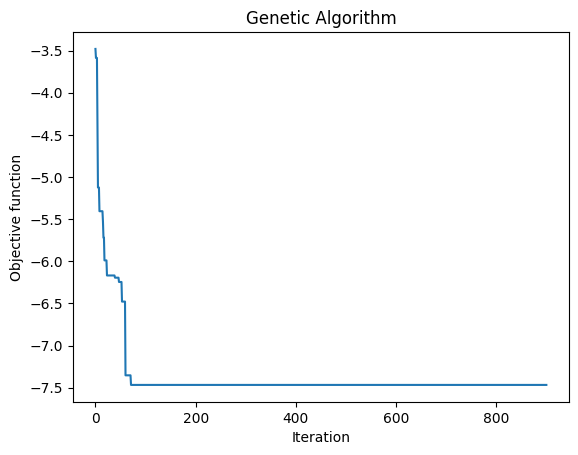

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1.]

 Objective function:
 -7.559373826844969


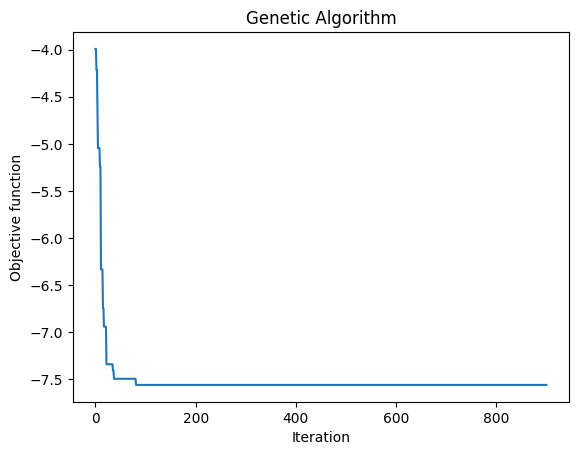

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1.]

 Objective function:
 -7.559373826844969


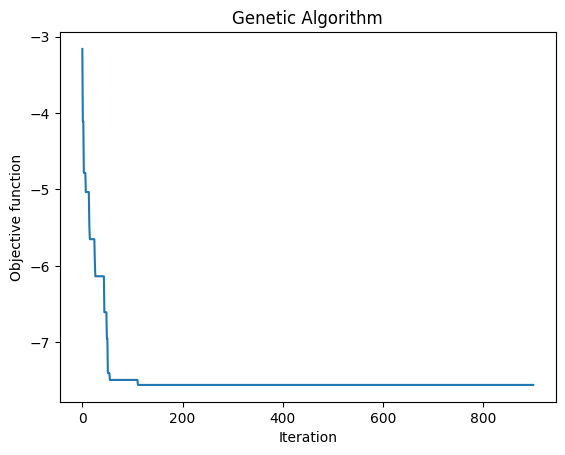

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1.]

 Objective function:
 -7.559373826844969


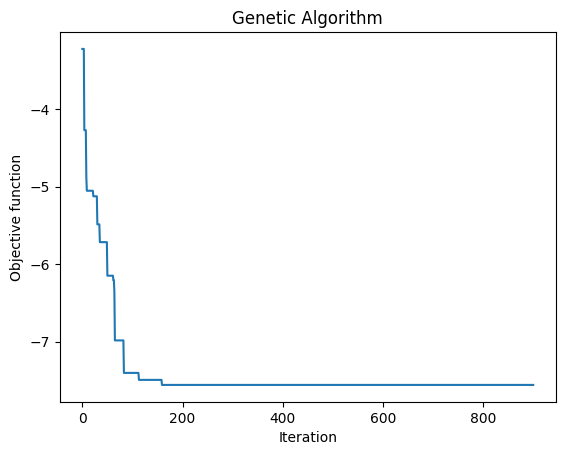

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0.]

 Objective function:
 -7.466156803647695


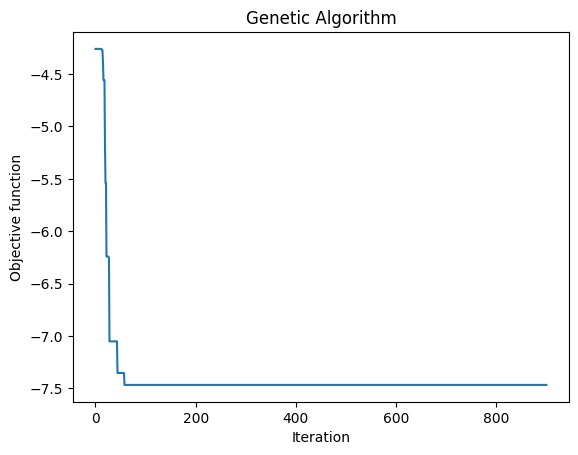

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


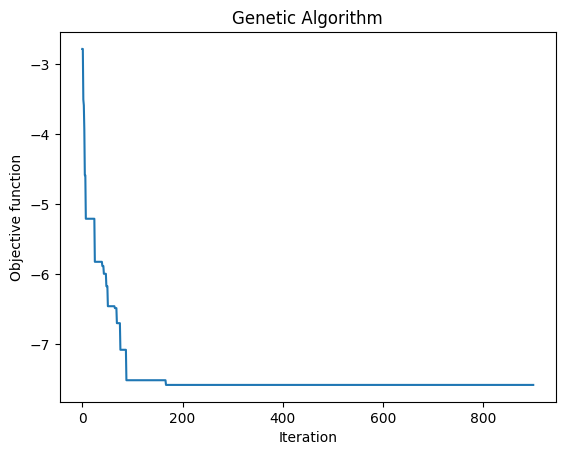

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


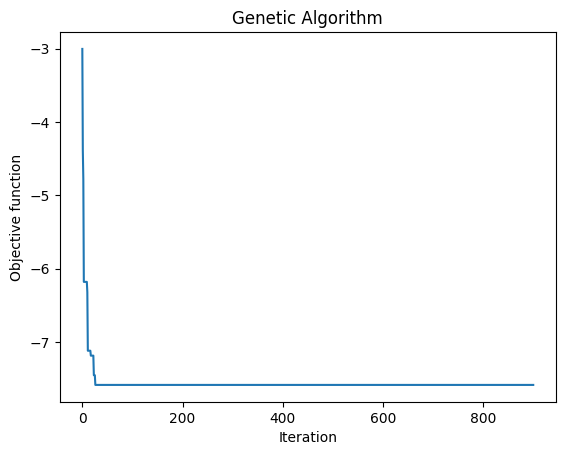

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1.]

 Objective function:
 -7.559373826844969


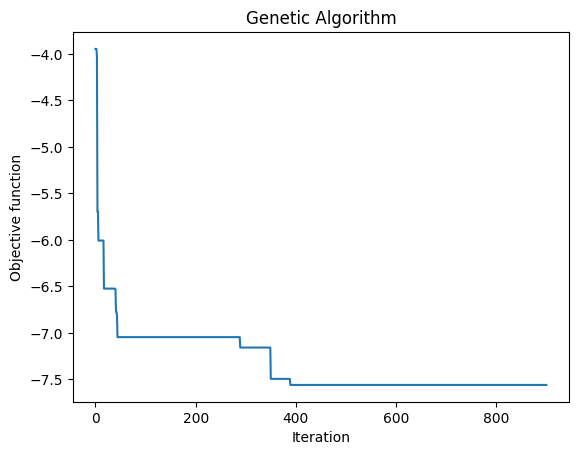

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1.]

 Objective function:
 -7.466156803647695


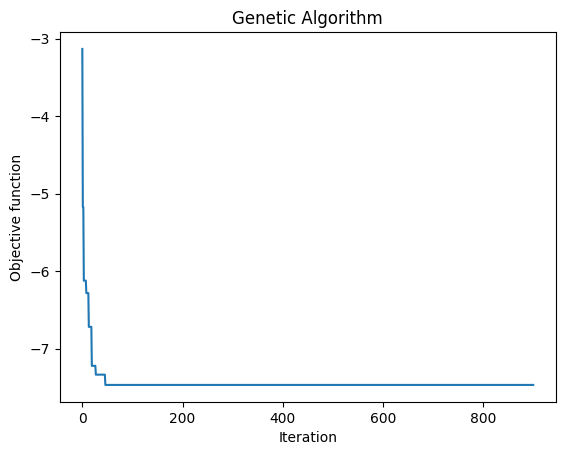

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1.]

 Objective function:
 -7.466156803647695


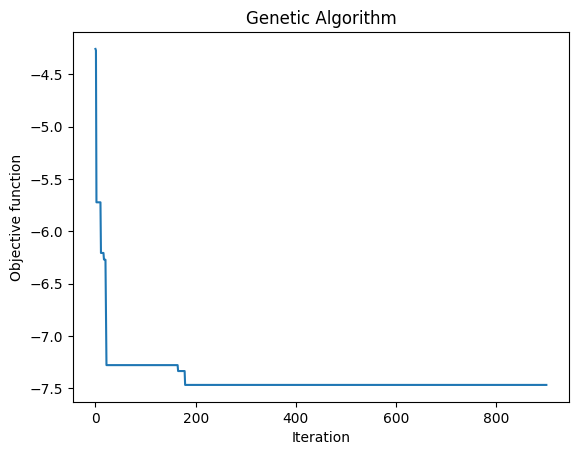

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.242456494221094


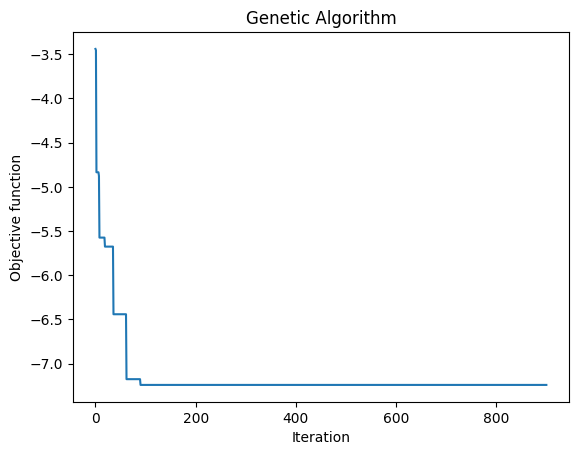

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.242456494221094


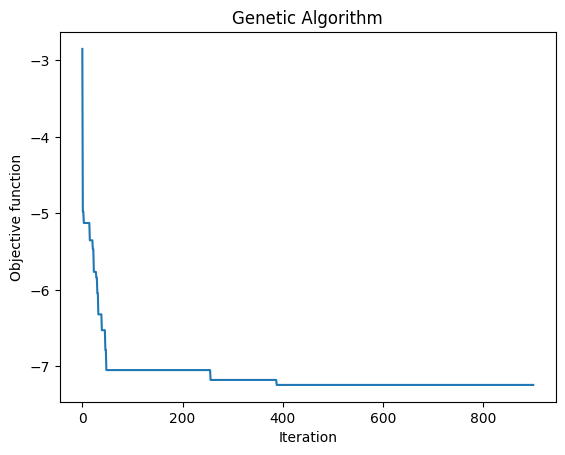

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


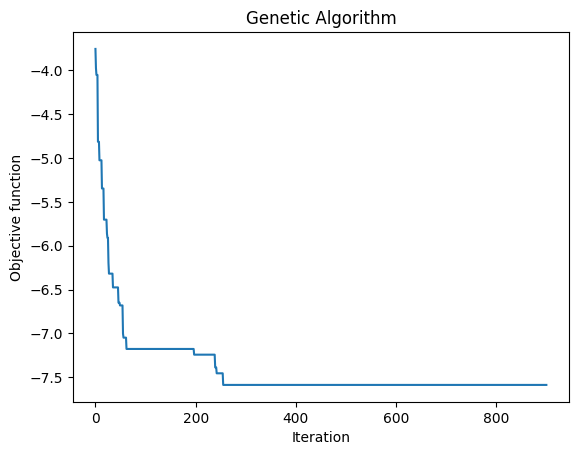

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0.]

 Objective function:
 -7.466156803647695


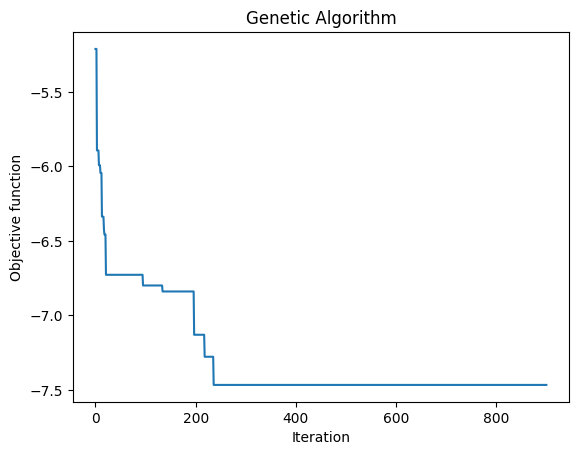

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


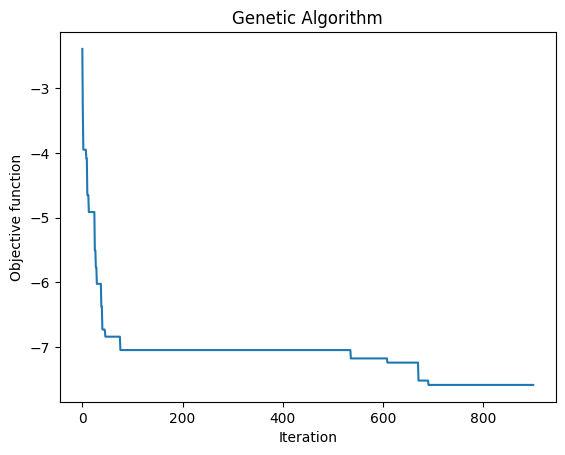

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


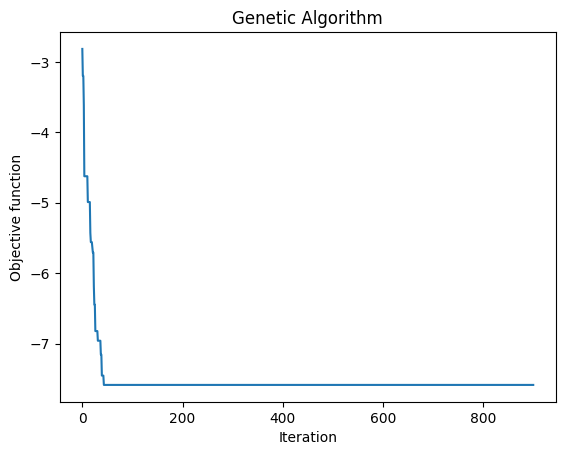

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


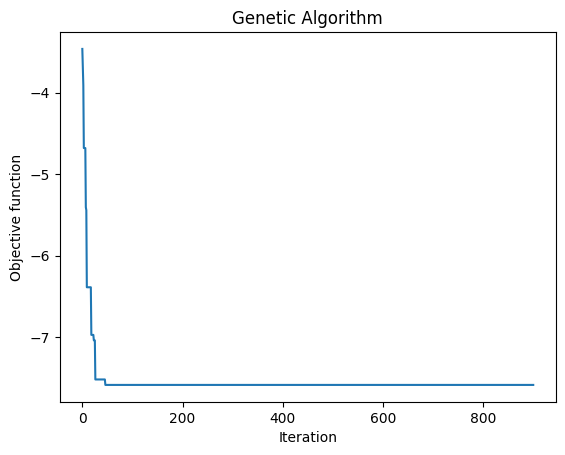

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


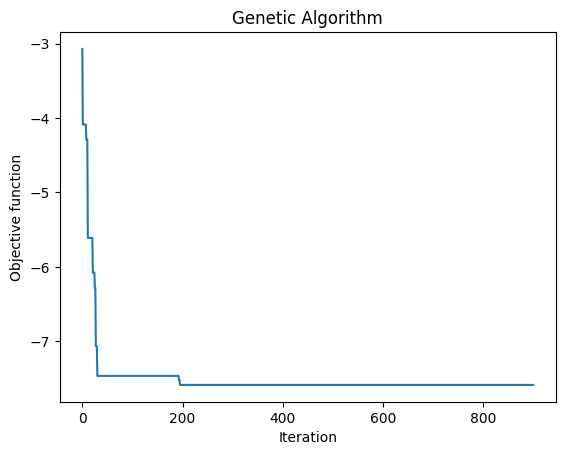

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0.]

 Objective function:
 -7.559373826844969


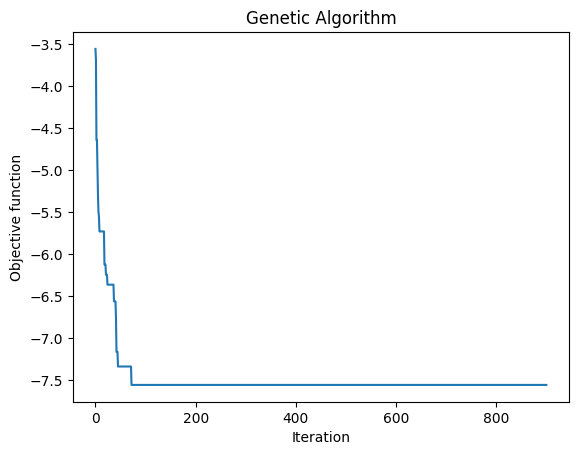

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


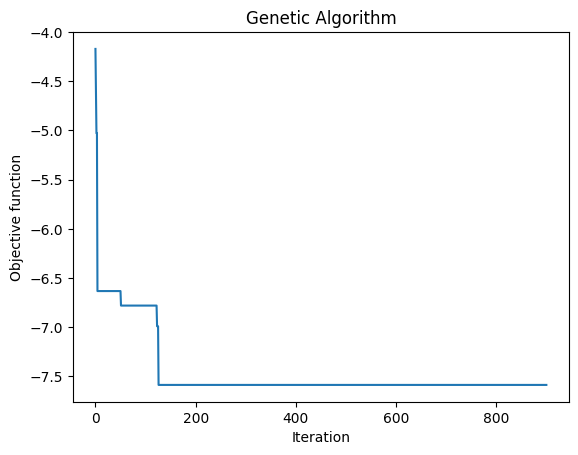

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


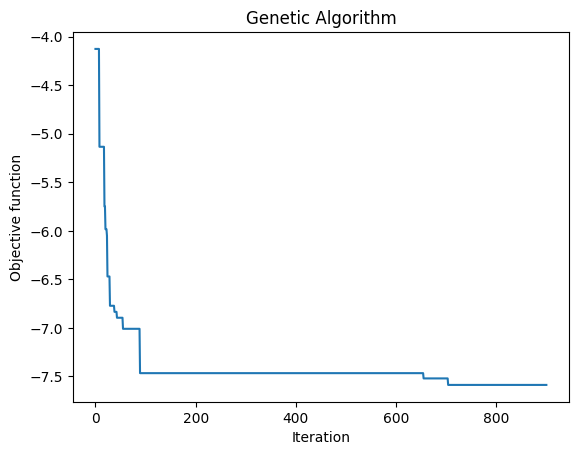

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


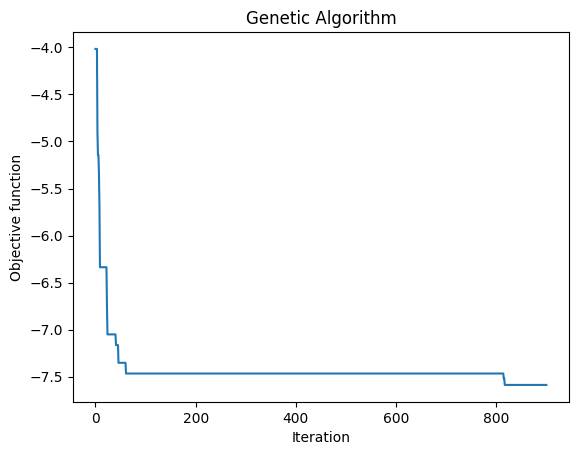

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0.]

 Objective function:
 -7.559373826844969


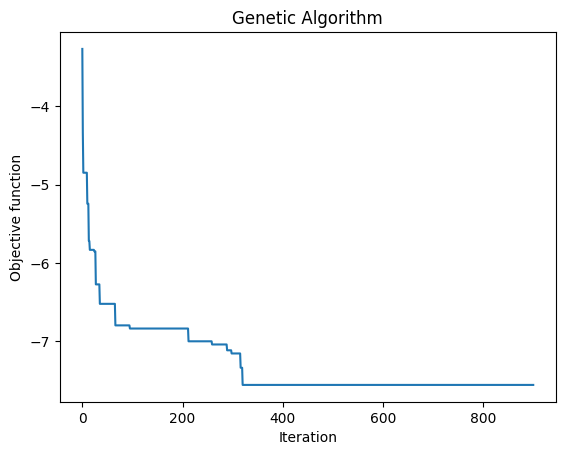

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.242456494221094


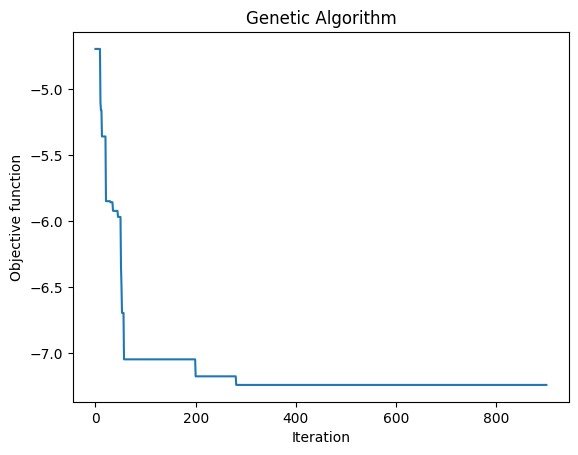

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


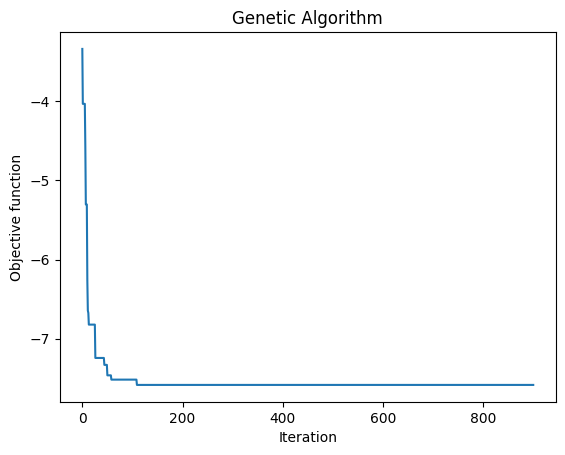

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.242456494221094


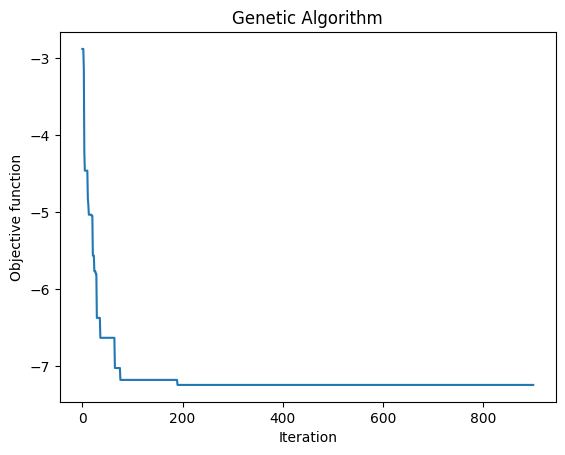

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


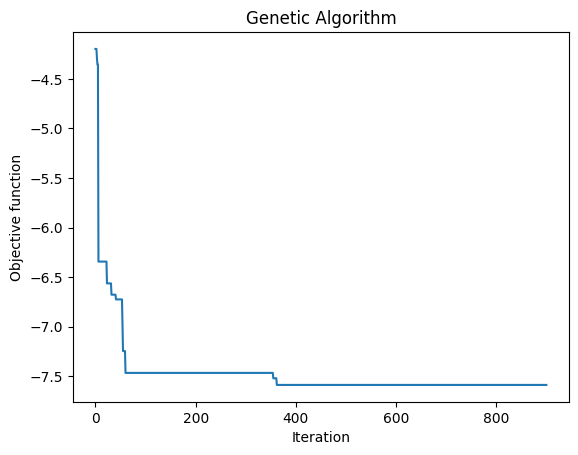

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1.]

 Objective function:
 -7.559373826844969


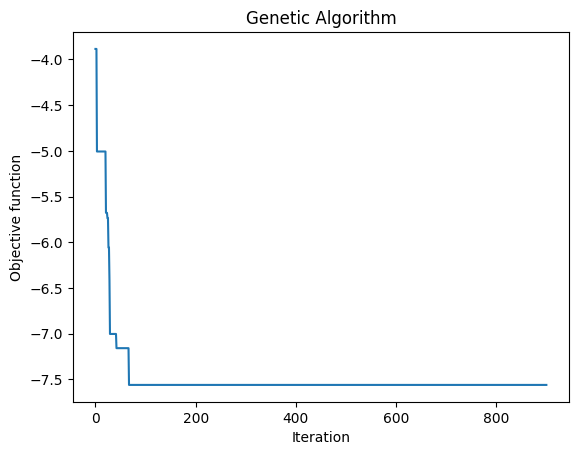

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


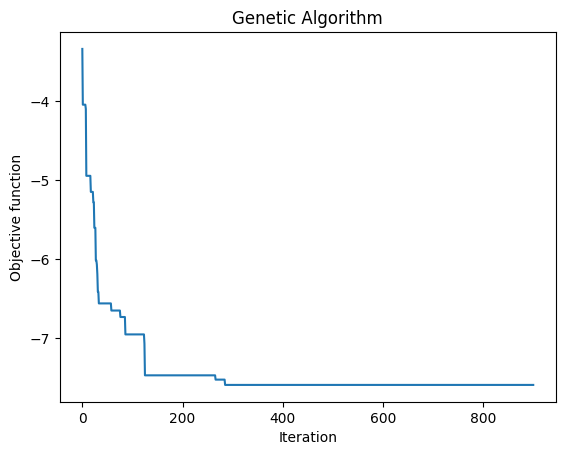

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1.]

 Objective function:
 -7.466156803647695


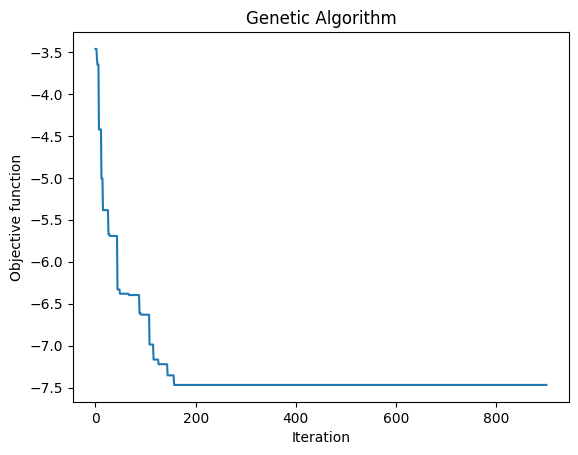

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


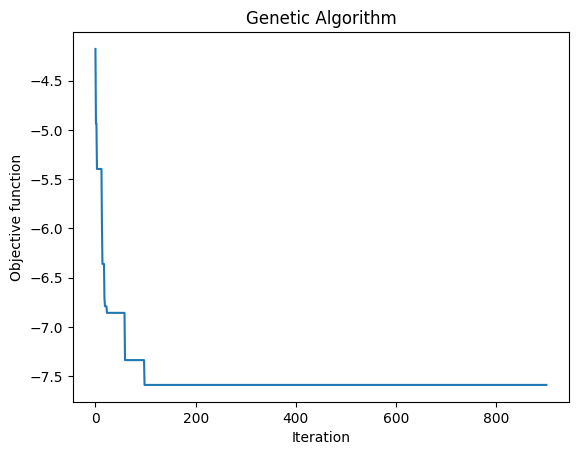

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0.]

 Objective function:
 -7.559373826844969


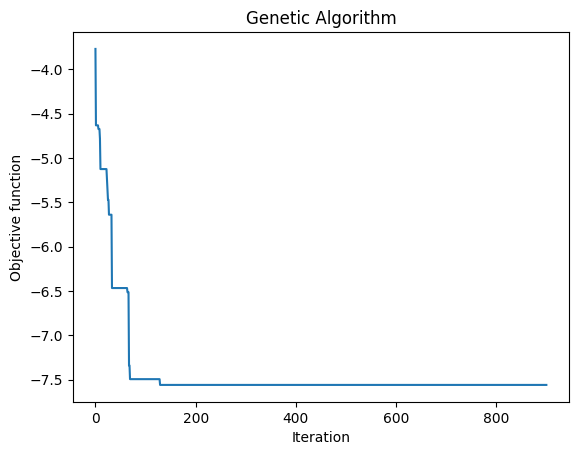

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1.]

 Objective function:
 -7.559373826844969


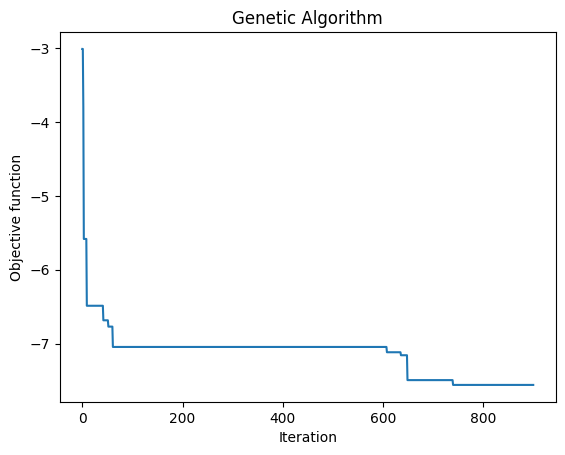

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0.]

 Objective function:
 -7.559373826844969


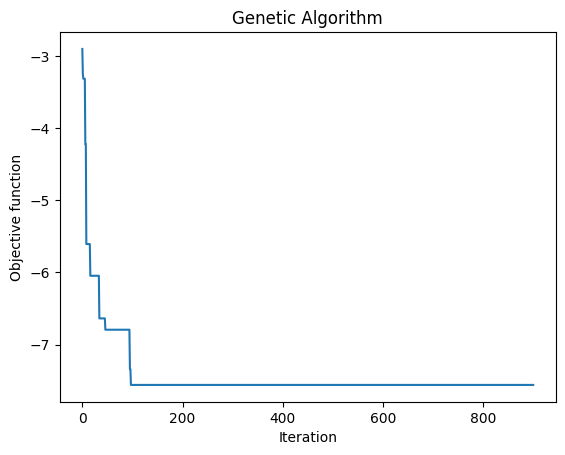

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


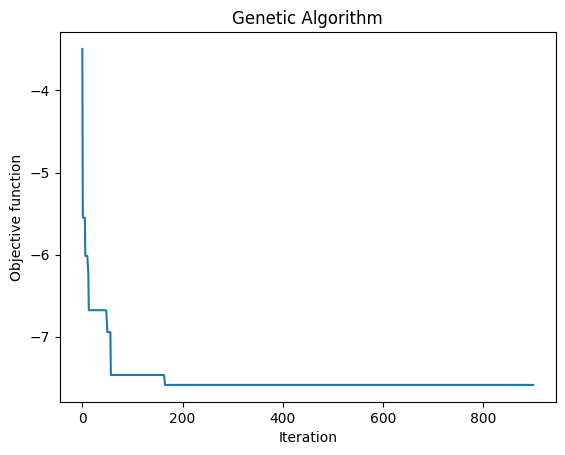

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


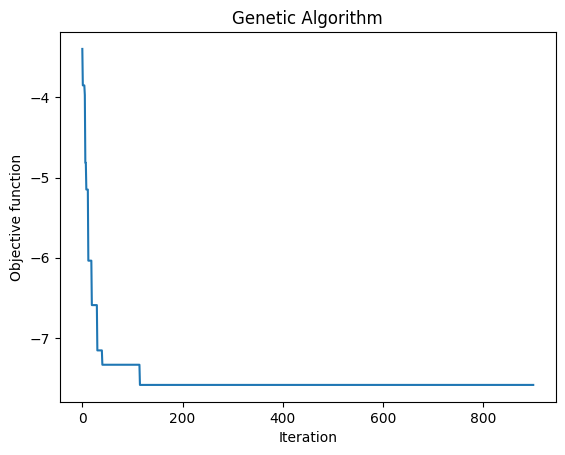

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


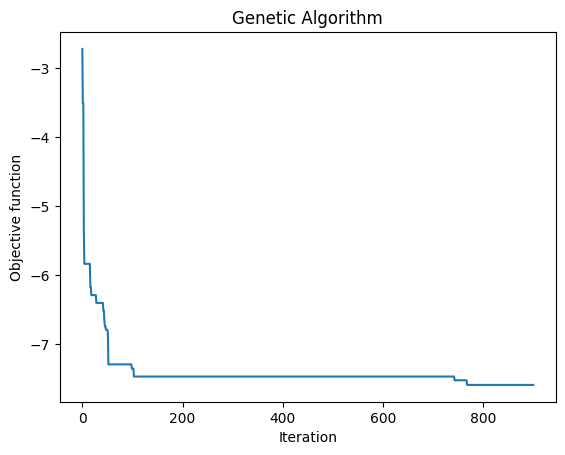

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


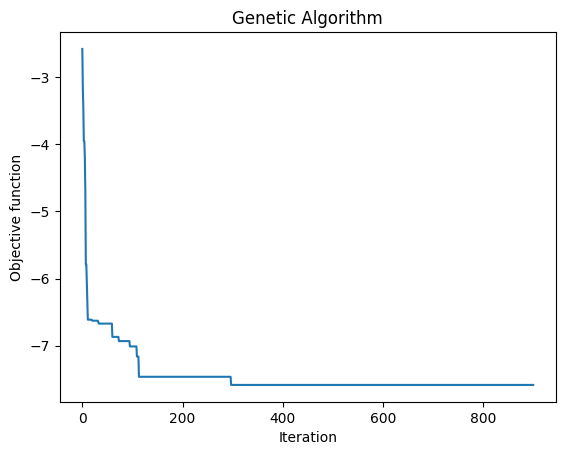

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


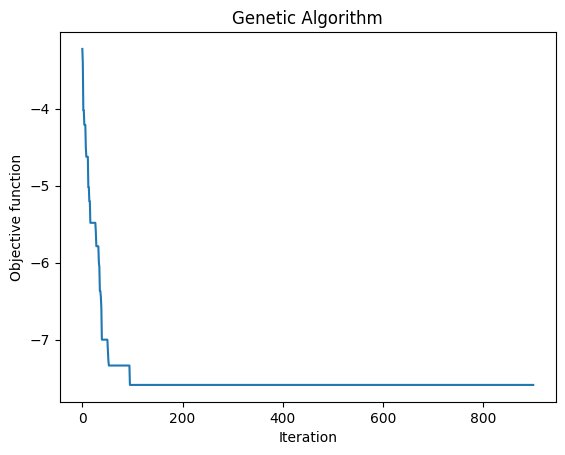

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


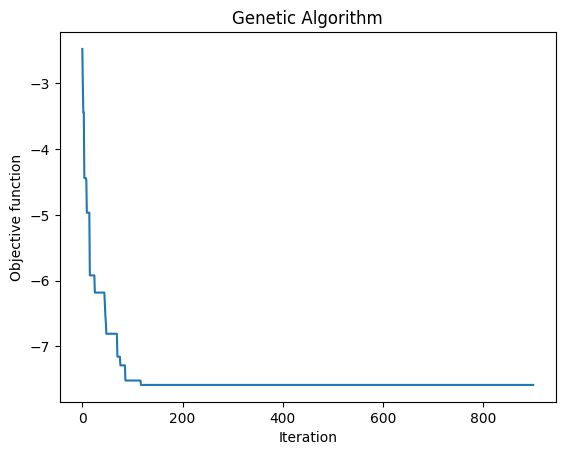

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


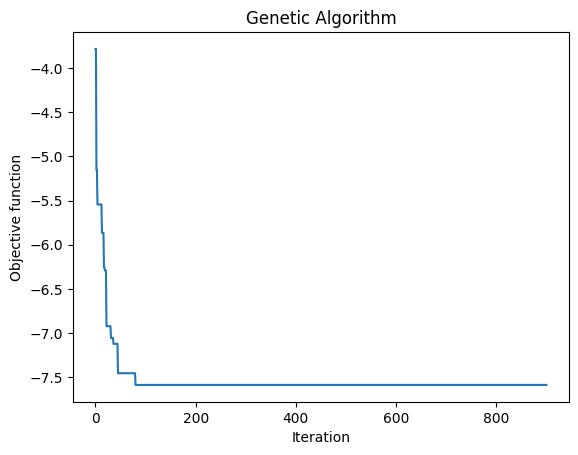

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0.]

 Objective function:
 -7.466156803647695


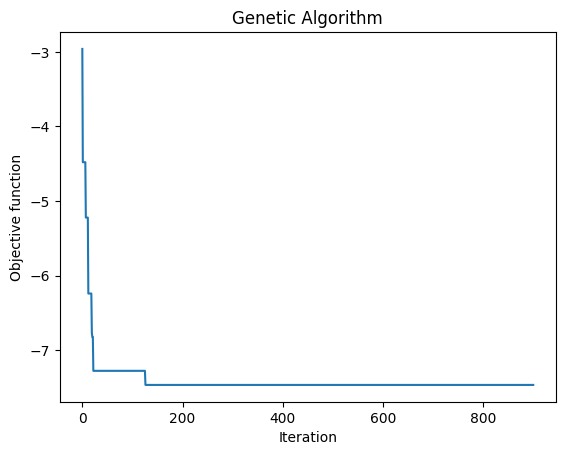

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1.]

 Objective function:
 -7.559373826844969


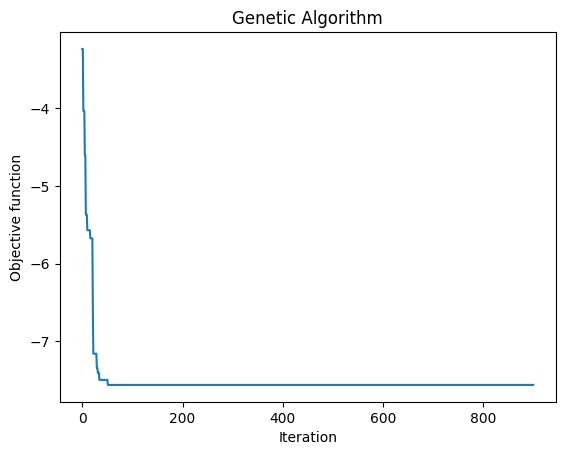

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


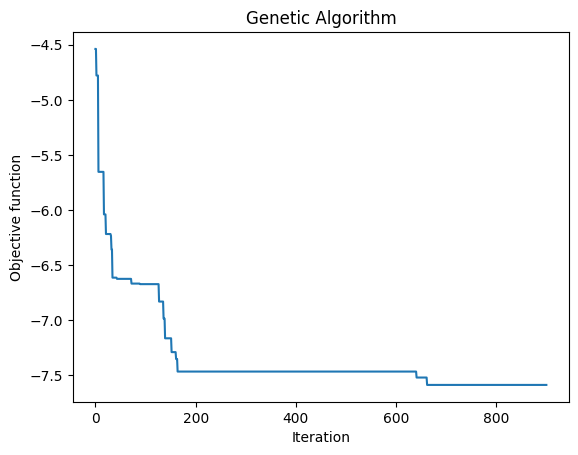

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1.]

 Objective function:
 -7.559373826844969


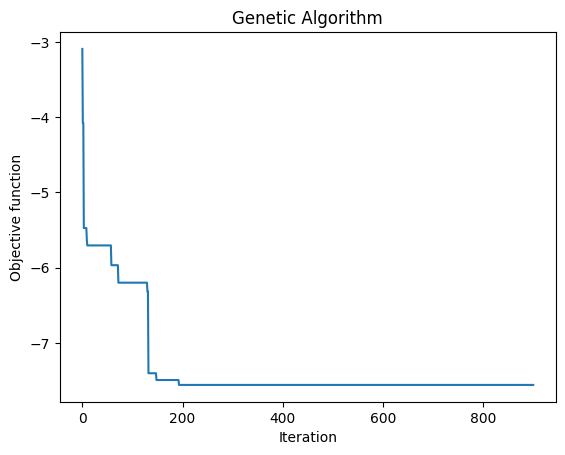

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


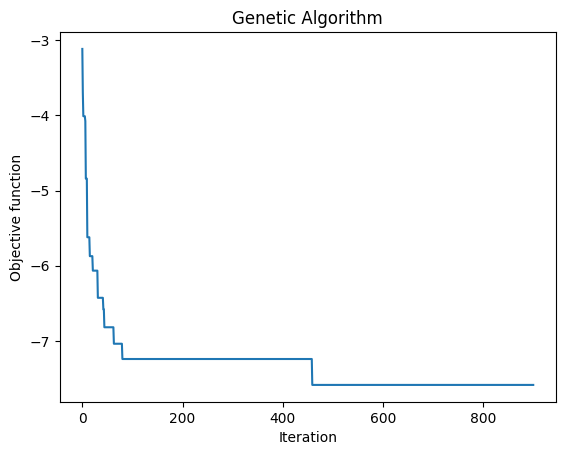

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1.]

 Objective function:
 -7.559373826844969


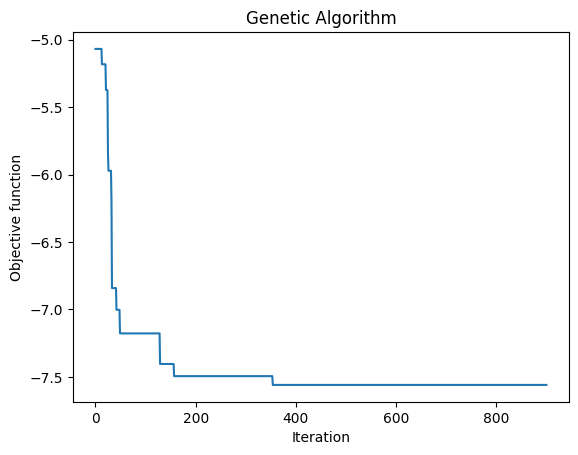

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


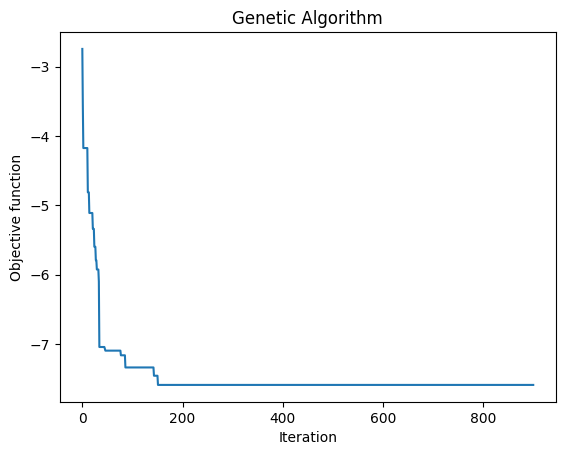

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


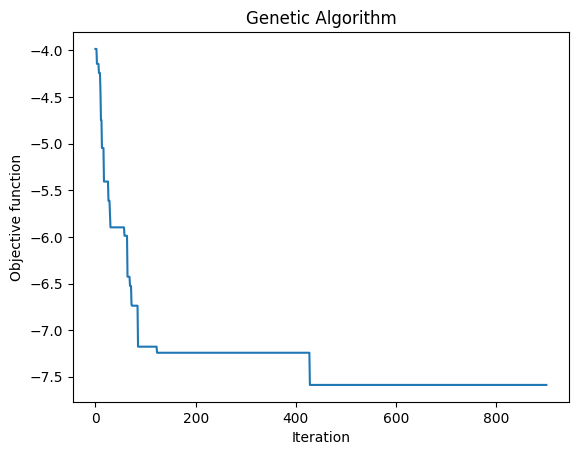

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0.]

 Objective function:
 -7.559373826844969


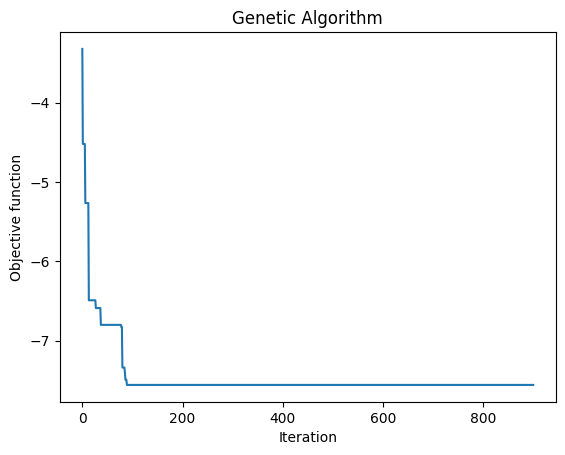

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.242456494221094


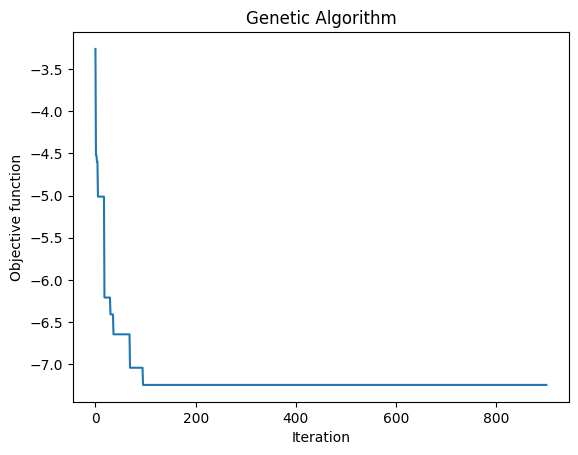

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


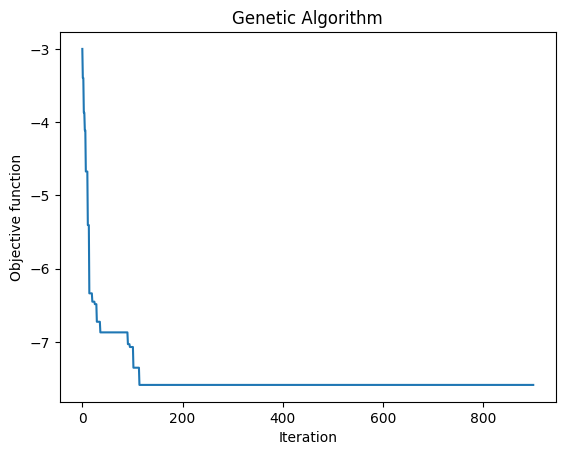

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1.]

 Objective function:
 -7.466156803647695


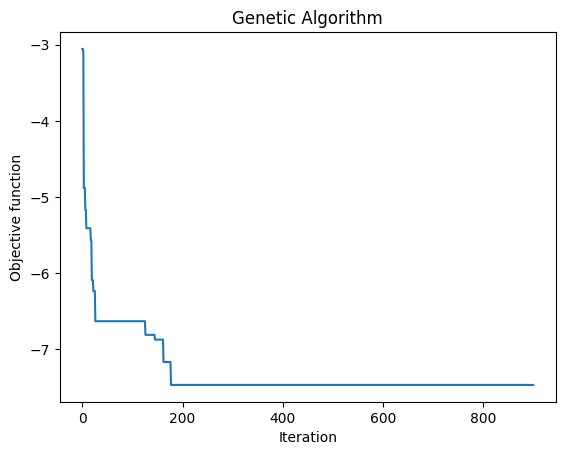

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1.]

 Objective function:
 -7.559373826844969


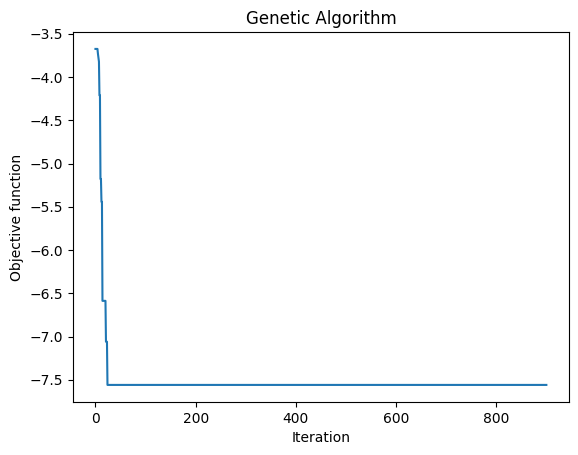

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


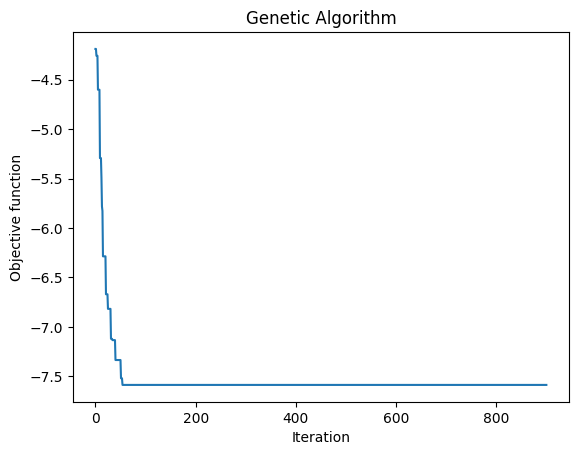

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0.]

 Objective function:
 -7.466156803647695


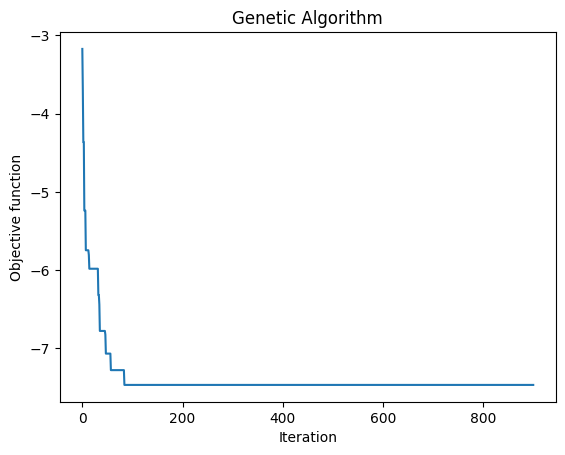

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1.]

 Objective function:
 -7.559373826844969


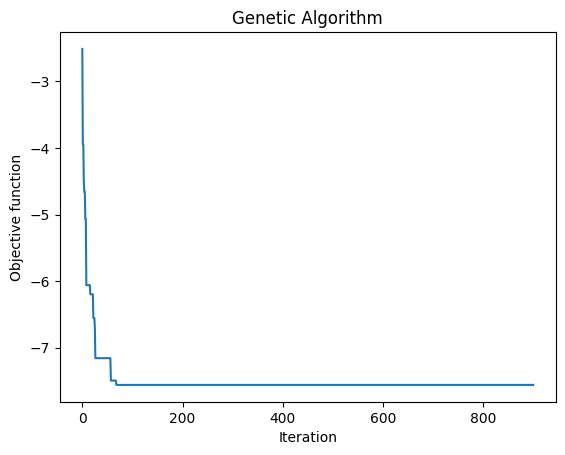

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0.]

 Objective function:
 -7.559373826844969


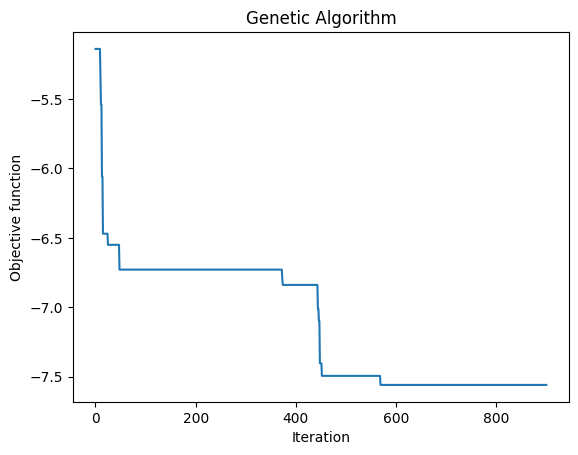

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1.]

 Objective function:
 -7.559373826844969


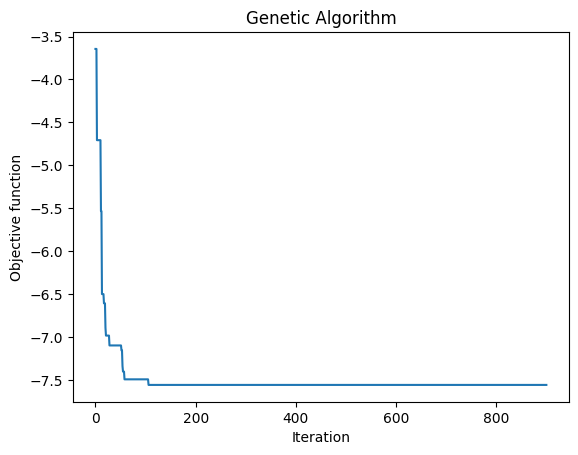

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0.]

 Objective function:
 -7.466156803647695


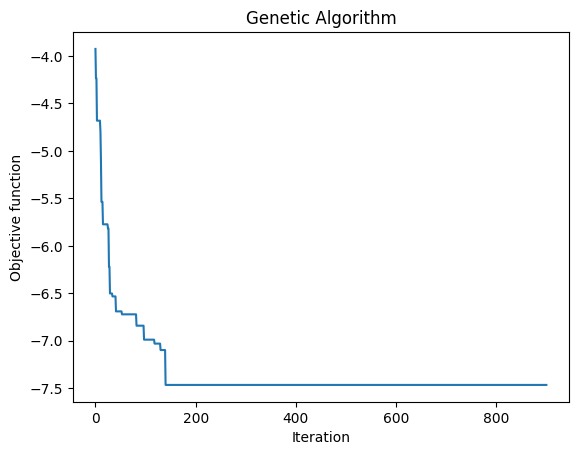

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1.]

 Objective function:
 -7.466156803647695


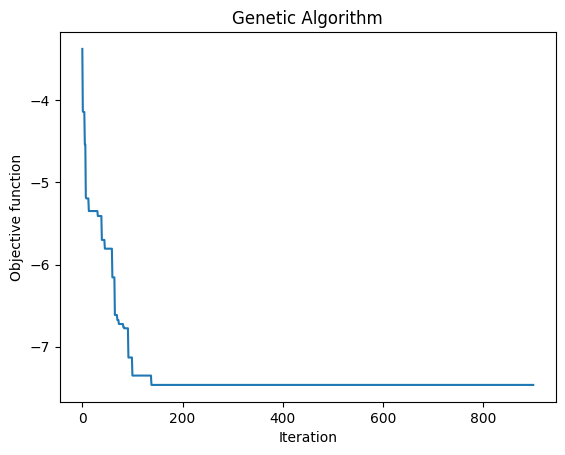

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


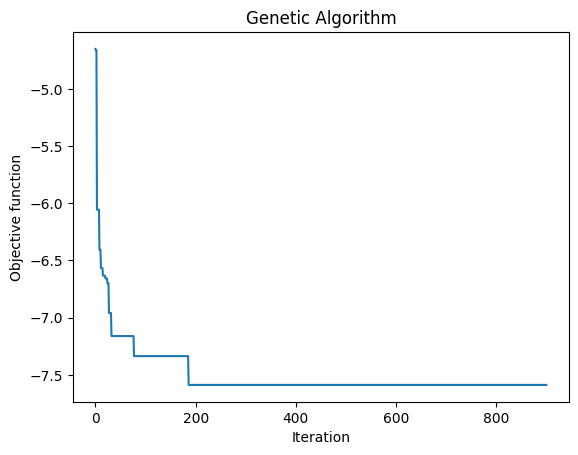

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0.]

 Objective function:
 -7.559373826844969


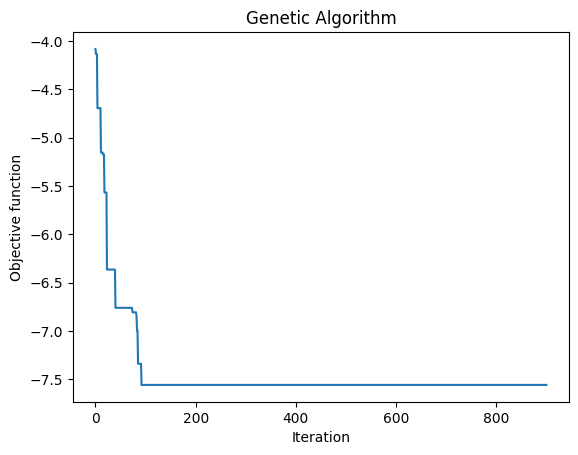

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0.]

 Objective function:
 -7.559373826844969


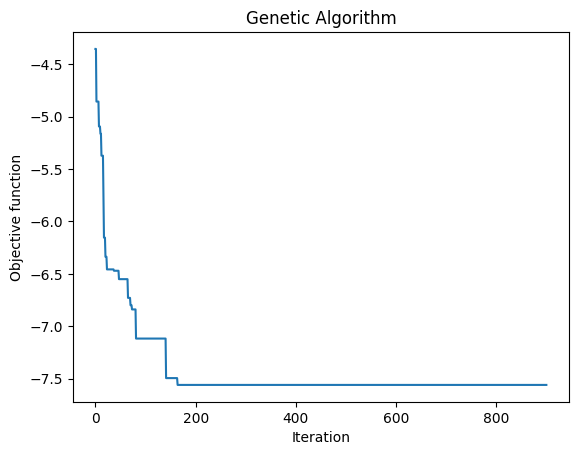

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.242456494221094


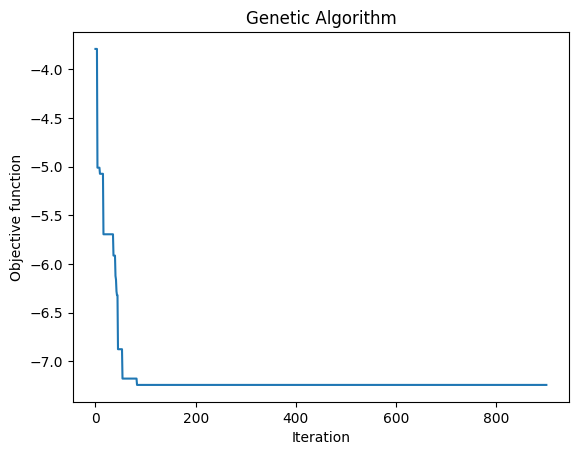

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


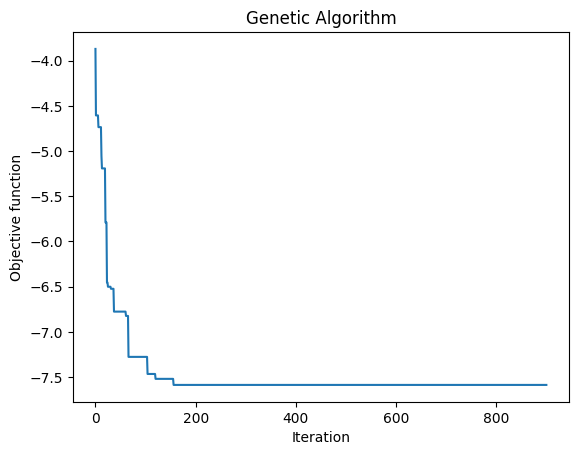

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0.]

 Objective function:
 -7.559373826844969


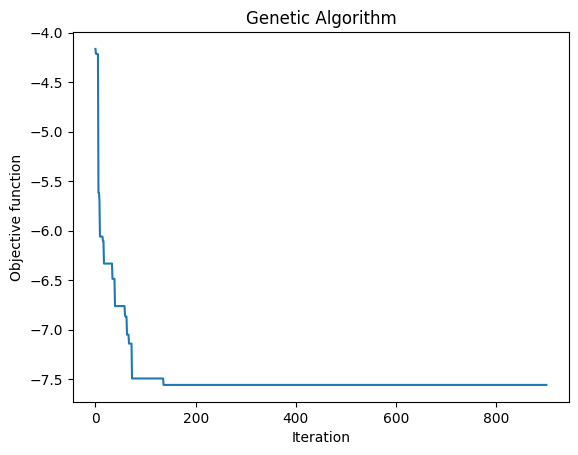

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


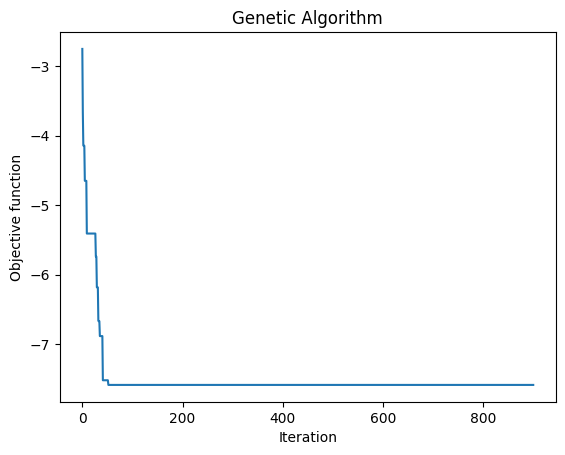

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1.]

 Objective function:
 -7.559373826844969


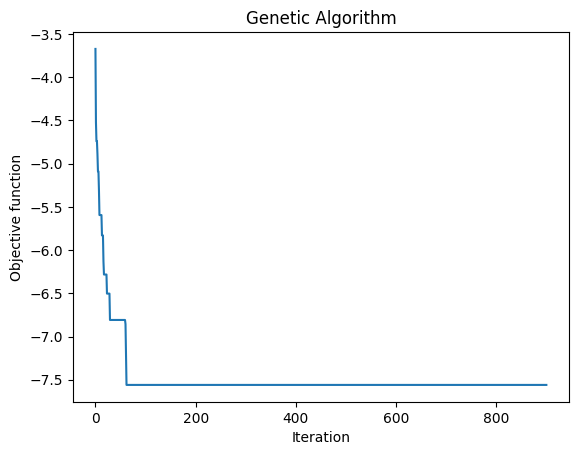

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.242456494221094


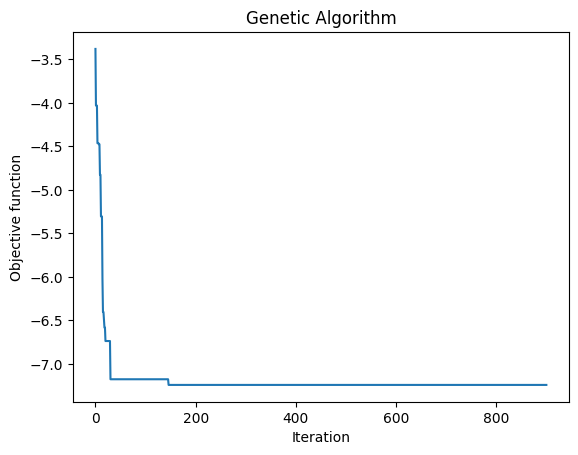

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


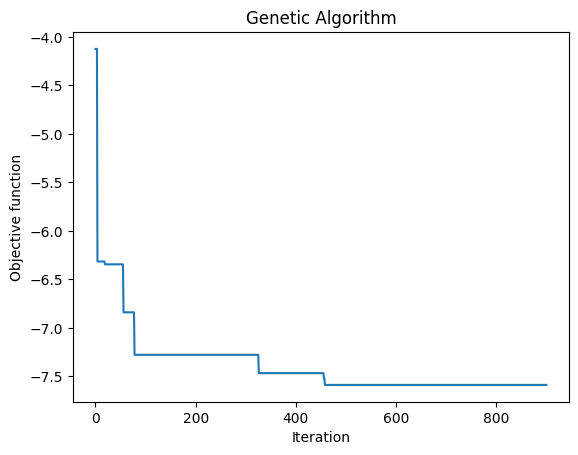

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0.]

 Objective function:
 -7.466156803647695


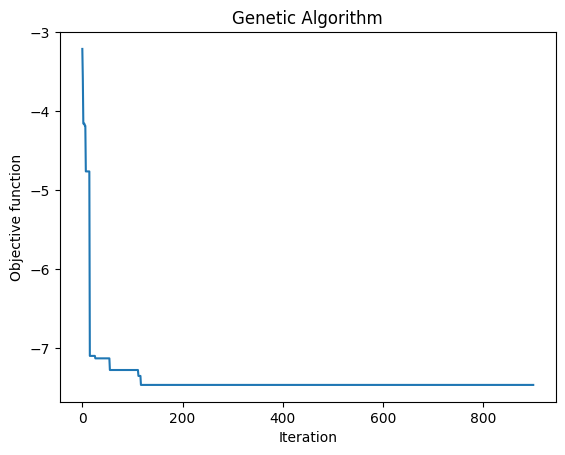

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


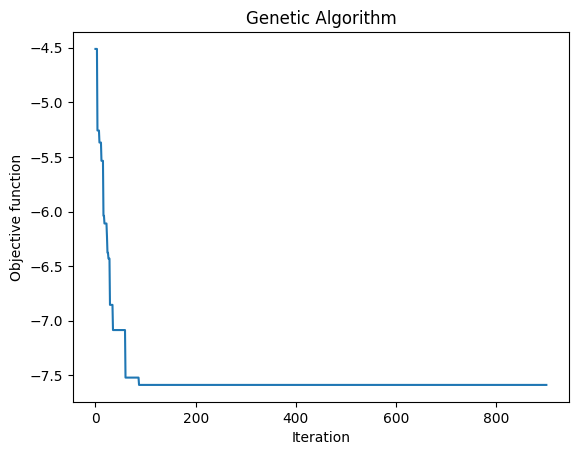

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


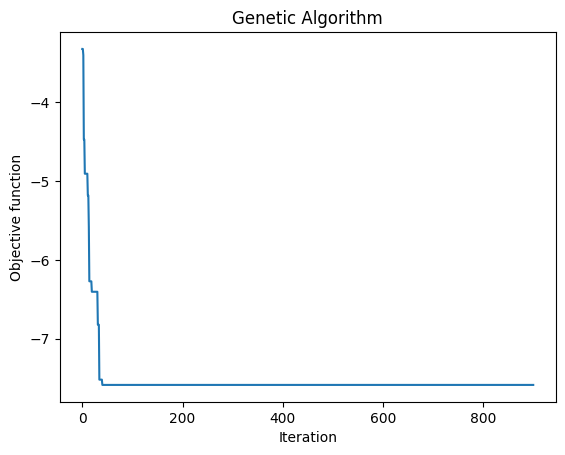

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1.]

 Objective function:
 -7.559373826844969


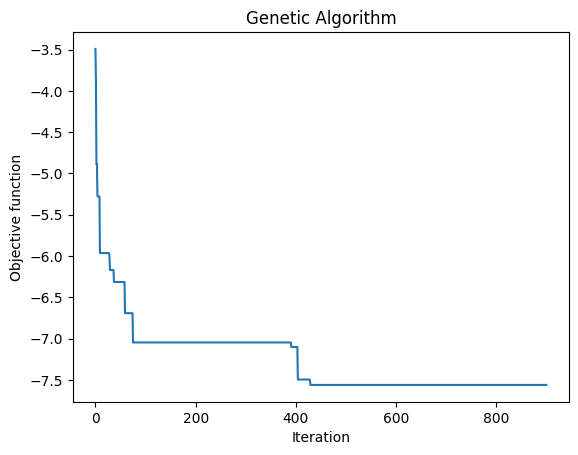

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1.]

 Objective function:
 -7.559373826844969


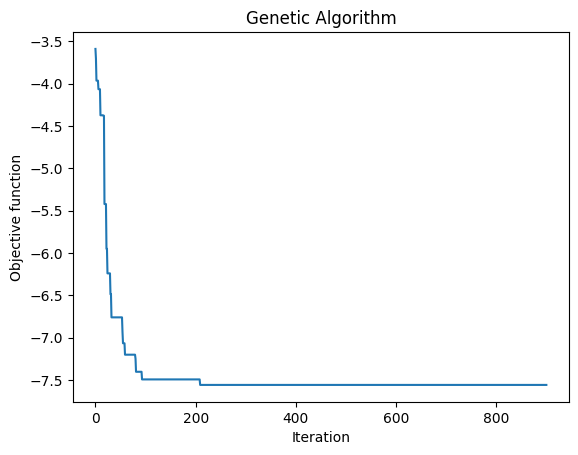

 The best solution found:                                                                           
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0.]

 Objective function:
 -7.559373826844969


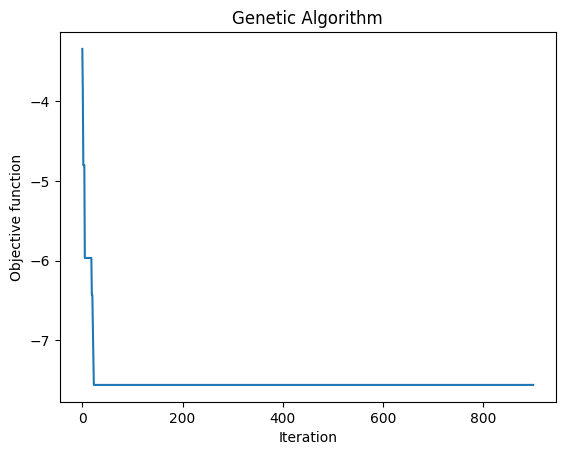

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


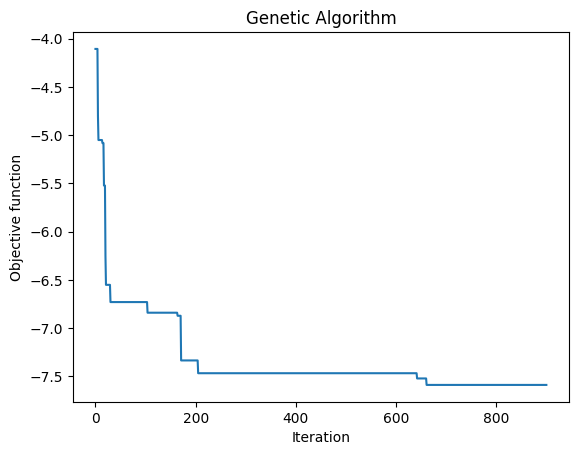

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


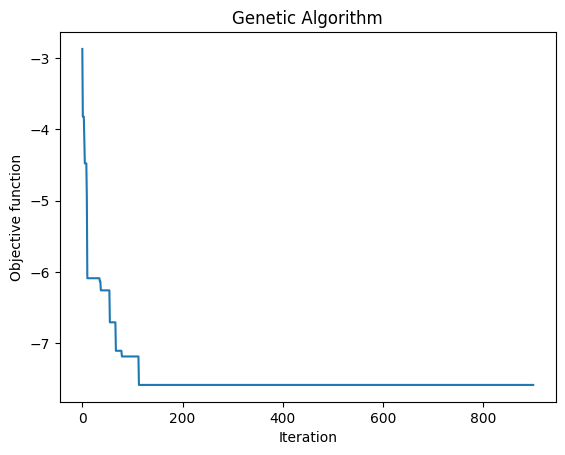

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


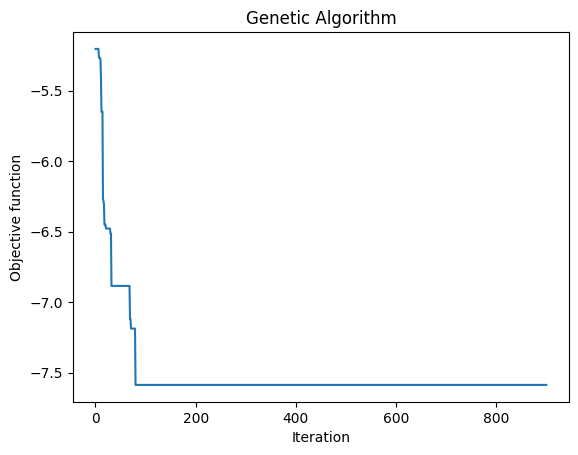

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]

 Objective function:
 -7.587410258271027


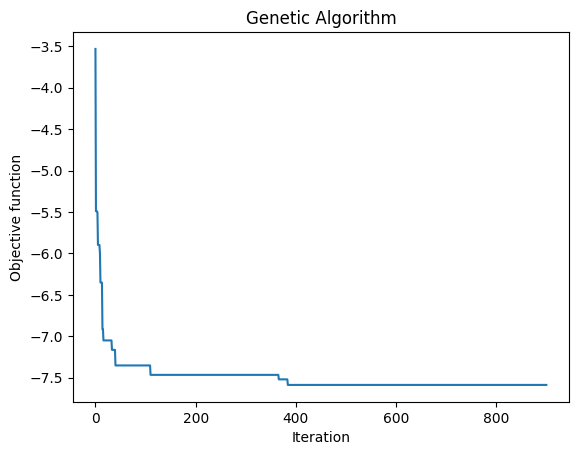

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


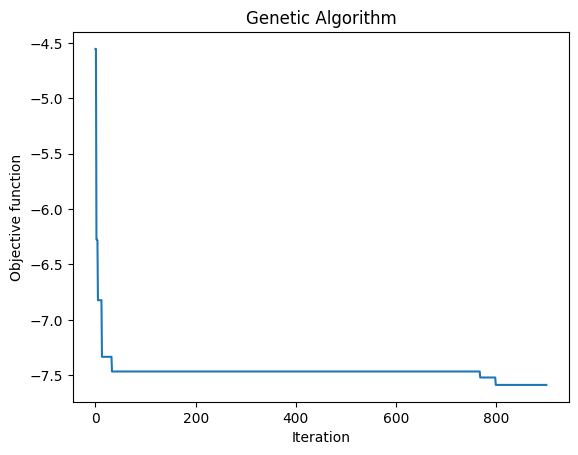

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


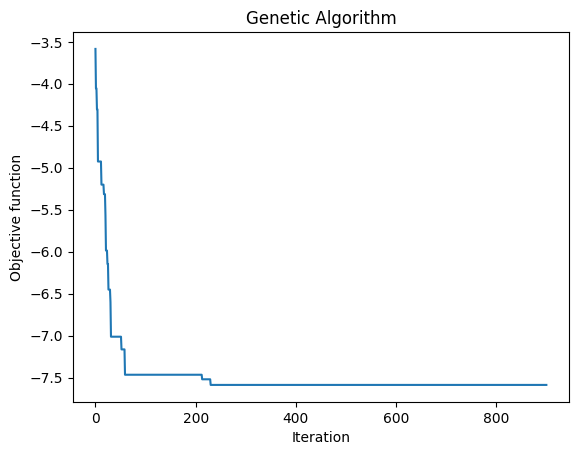

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


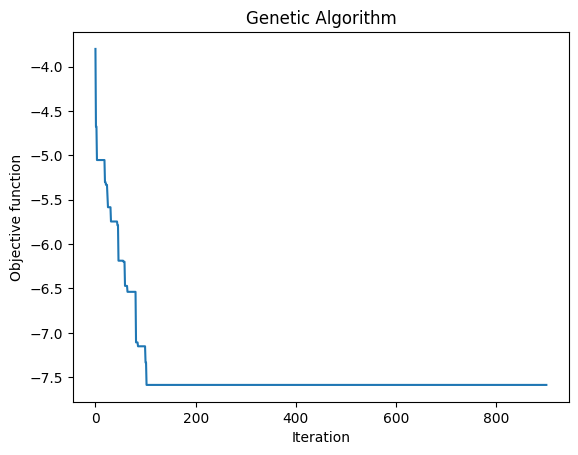

 The best solution found:                                                                           
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0.]

 Objective function:
 -7.587410258271027


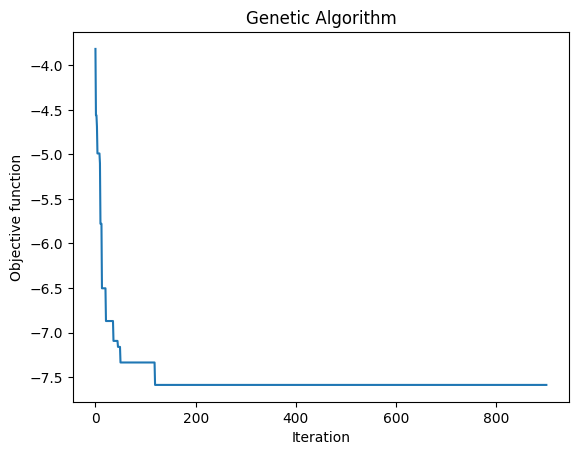

||||||||||||||||||||||||||||||||||||||||||||||||__ 96.8% GA is running...

In [ ]:
# Definimos la matriz de adyacencia
A0 = np.random.uniform(-1,1,(30,30))
for i in range(A0.shape[0]):
    for j in range(i, A0.shape[0]):
        A0[i,j]=0
        r = np.random.rand()
        if r<0.8:
            A0[j,i]=0
        
At = np.transpose(A0)
A = A0 + At
#A = -A
X = np.ones(A.shape[0])

# Ploteamos el grafo de configuración
generate_graph(A,X)

# Calculamos las soluciones
best_solutions = generate_solutions(A)

# Filtramos las soluciones resultantes para obtener y visualizar la de menor energía
analize_solutions(best_solutions, A)